In [1]:
import geopandas as gpd 
import pandas as pd 
import os


print(os.getcwd())

c:\Users\20191\Desktop\XGBoost_Modelling


In [2]:
BASE_PATH = './'
DATA_PATH = {
    "2022_ACCIDENT" : f"{BASE_PATH+'2022/2022_accident_deduplicated.csv'}",
    "2022_GSV_RECORDER" : f"{BASE_PATH+'2022/2022_GSV_recorder.csv'}",
    "2022_SEG_RESULT":f"{BASE_PATH+'2022/result_2022.csv'}",
    "2021_ACCIDENT" : f"{BASE_PATH+'2021/2021_accident_deduplicated.csv'}",
    "2021_GSV_RECORDER" : f"{BASE_PATH+'2021/2021_GSV_recorder.csv'}",
    "2021_SEG_RESULT":f"{BASE_PATH+'2021/result_2021.csv'}",
    "2020_ACCIDENT" : f"{BASE_PATH+'2020/2020_accident_deduplicated.csv'}",
    "2020_GSV_RECORDER" : f"{BASE_PATH+'2020/2020_GSV_recorder.csv'}",
    "2020_SEG_RESULT":f"{BASE_PATH+'2020/result_2020.csv'}",
    "MSOA":f"{BASE_PATH+'MSOA.geojson'}"
}

In [3]:
boundary = gpd.read_file(DATA_PATH['MSOA'])
# accident table
accident_location_2022 = pd.read_csv(DATA_PATH['2022_ACCIDENT'])[[
    '_Collision Id',  'Easting', 'Northing','Driver Age'
]].drop_duplicates(['_Collision Id']).set_index(['_Collision Id'])

# SEG Result
seg_res_2022 = pd.read_csv(DATA_PATH['2022_SEG_RESULT'])[[
    "GSV_ID", 'Person', 'Bike', 'HeavyV', 'LightV', 'Facade', 'WindowOpening',
    'Road', 'Sidewalk', 'StreetFurniture', 'GreeneryTree', 'GreeneryGrass',
    'Sky', 'Nature'
]].set_index(['GSV_ID'])

# GSV_ Processing
GSV_recorder_2022 = pd.read_csv(DATA_PATH['2022_GSV_RECORDER'])[[
    '_Collision Id', 'GSV_ID'
]].drop_duplicates().set_index("_Collision Id")
GSV_recorder_2022 = GSV_recorder_2022[GSV_recorder_2022['GSV_ID'] != '0']

# 2021
# accident table
accident_location_2021 = pd.read_csv(DATA_PATH['2021_ACCIDENT'])[[
    '_Collision Id', 'Easting', 'Northing', 'Driver Age'
]].drop_duplicates(['_Collision Id']).set_index(['_Collision Id'])

# SEG Result
seg_res_2021 = pd.read_csv(DATA_PATH['2021_SEG_RESULT'])[[
    "GSV_ID", 'Person', 'Bike', 'HeavyV', 'LightV', 'Facade', 'WindowOpening',
    'Road', 'Sidewalk', 'StreetFurniture', 'GreeneryTree', 'GreeneryGrass',
    'Sky', 'Nature'
]].set_index(['GSV_ID'])

# GSV_ Processing
GSV_recorder_2021 = pd.read_csv(DATA_PATH['2021_GSV_RECORDER'])[[
    '_Collision Id', 'GSV_ID'
]].drop_duplicates().set_index("_Collision Id")
GSV_recorder_2021 = GSV_recorder_2021[GSV_recorder_2021['GSV_ID'] != '0']

# 2020
# accident table
accident_location_2020 = pd.read_csv(DATA_PATH['2020_ACCIDENT'])[[
    '_Collision Id', 'Easting', 'Northing', 'Driver Age'
]].drop_duplicates(['_Collision Id']).set_index(['_Collision Id'])

# SEG Result
seg_res_2020 = pd.read_csv(DATA_PATH['2020_SEG_RESULT'])[[
    "GSV_ID", 'Person', 'Bike', 'HeavyV', 'LightV', 'Facade', 'WindowOpening',
    'Road', 'Sidewalk', 'StreetFurniture', 'GreeneryTree', 'GreeneryGrass',
    'Sky', 'Nature'
]].set_index(['GSV_ID'])

# GSV_ Processing
GSV_recorder_2020 = pd.read_csv(DATA_PATH['2020_GSV_RECORDER'])[[
    '_Collision Id', 'GSV_ID'
]].drop_duplicates().set_index("_Collision Id")
GSV_recorder_2020 = GSV_recorder_2020[GSV_recorder_2020['GSV_ID'] != '0']

In [4]:
MSOA = boundary[['MSOA11CD', 'MSOA11NM', 'geometry']]
MSOA

MSOA11CD                  MSOA11NM  \
0    E02000001        City of London 001   
1    E02000002  Barking and Dagenham 001   
2    E02000003  Barking and Dagenham 002   
3    E02000004  Barking and Dagenham 003   
4    E02000005  Barking and Dagenham 004   
..         ...                       ...   
978  E02006927             Greenwich 034   
979  E02006928             Greenwich 035   
980  E02006929             Greenwich 036   
981  E02006930             Greenwich 037   
982  E02006931             Greenwich 038   

                                              geometry  
0    MULTIPOLYGON (((531667.624 180534.992, 531647....  
1    MULTIPOLYGON (((548881.563 190845.265, 548881....  
2    MULTIPOLYGON (((549102.438 189324.625, 548954....  
3    MULTIPOLYGON (((551549.998 187364.637, 551478....  
4    MULTIPOLYGON (((549099.634 187656.076, 549161....  
..                                                 ...  
978  MULTIPOLYGON (((541029.881 176265.023, 541101....  
979  MULTIPOLYGON (((538300.370 177956.632, 538290....  
980  MULTIPOLYGON (((540054.366 179353.136, 540220....  
981  MULTIPOLYGON (((539552.478 178604.042, 539533....  
982  MULTIPOLYGON (((538834.754 177736.770, 538880....  

[983 rows x 3 columns]

In [6]:
accident_location_young_2022 = accident_location_2022[
    accident_location_2022['Driver Age'] < 65]
accident_location_young_2021 = accident_location_2021[
    accident_location_2021['Driver Age'] < 65]
accident_location_young_2020 = accident_location_2020[
    accident_location_2020['Driver Age'] < 65]
accident_location_young_2020

Easting  Northing  Driver Age
_Collision Id                               
1200257426      533622    180141          35
1200268129      532462    181961          48
1200280437      533647    181203          25
48200932288     533310    180693          62
48200932294     531605    181360          55
...                ...       ...         ...
1200286713      533309    192087          59
1200287423      534438    197790          37
1200287949      532127    192562          38
1200289300      535420    192148          25
1200294498      535550    198614          22

[7367 rows x 3 columns]

In [7]:
total_young = pd.concat([
    accident_location_young_2020, accident_location_young_2021,
    accident_location_young_2022
])
total_young

Easting  Northing  Driver Age
_Collision Id                               
1200257426      533622    180141          35
1200268129      532462    181961          48
1200280437      533647    181203          25
48200932288     533310    180693          62
48200932294     531605    181360          55
...                ...       ...         ...
48221290750     533225    181152          53
48221290761     533330    180697          20
48221291921     532690    181815          61
48221292373     532976    180959          34
48221292435     533626    181111          51

[23126 rows x 3 columns]

In [8]:
recorder_total = pd.concat([GSV_recorder_2020,GSV_recorder_2021,GSV_recorder_2022])
recorder_total

GSV_ID
_Collision Id                                                   
1200240171                                vkXigtL2L3iwipGmKsHFpQ
1200257426     CAoSLEFGMVFpcFA0eEZWVUJHWWs4Y1hsWnM5UDdLUEl0RE...
1200268129                                SjZ-sgwePgHbU1uM9RpoZA
1200280437                                NS1NYUyAgpi8yB19cwca1w
1200282469                                oxZqqE3v_ui6HXrQ-JV9Xg
...                                                          ...
48221290750    CAoSLEFGMVFpcE9VWlppYXVIamFIeWtXTEh6d1QwVE9Pc0...
48221290761                               GQrRkoMBvRRyrsOuEcA0-Q
48221291921                               TC-DhItdWOk3PwYmTScaag
48221292373    CAoSLEFGMVFpcE01RWM2Um1iZnBIcE5fXzFRUHZwS2c1SX...
48221292435                               vA87ZpcsL0NpVVn5_PZdLw

[24880 rows x 1 columns]

In [9]:
seg_res_total = pd.concat([seg_res_2020,seg_res_2021,seg_res_2022]).reset_index().drop_duplicates(['GSV_ID']).set_index(['GSV_ID'])
seg_res_total

Person  Bike  HeavyV  LightV  Facade  WindowOpening  \
GSV_ID                                                                        
WgoXuTYYlCn0xWGIFE5sZQ     0.0  0.00    0.00    0.03    0.21            0.0   
iCIUU93iqggsqj1tf-Hy0A     0.0  0.00    0.00    0.06    0.62            0.0   
Ix1e7mGK1-NMTO2aLZNfKw     0.0  0.00    0.00    0.01    0.15            0.0   
DTXmEYQz3B-kRLh2OuYqAw     0.0  0.00    0.00    0.03    0.19            0.0   
HSAvNpINJXVx-SFsrKFsoA     0.0  0.00    0.00    0.04    0.37            0.0   
...                        ...   ...     ...     ...     ...            ...   
STe6_hUjOFDzQORWpXPcNw     0.0  0.00    0.00    0.06    0.34            0.0   
cnXSdgCq6Y0rwaECe90UXA     0.0  0.00    0.00    0.07    0.40            0.0   
bCTf_YWtIn9Zv9VIwTHutg     0.0  0.01    0.00    0.02    0.37            0.0   
5EUsWt-OwvpvAJMmHZXJQg     0.0  0.00    0.00    0.06    0.24            0.0   
t5yZehQsla_AO8j5kcfR8Q     0.0  0.00    0.03    0.05    0.21            0.0   

                        Road  Sidewalk  StreetFurniture  GreeneryTree  \
GSV_ID                                                                  
WgoXuTYYlCn0xWGIFE5sZQ  0.25      0.04             0.01          0.10   
iCIUU93iqggsqj1tf-Hy0A  0.18      0.04             0.01          0.00   
Ix1e7mGK1-NMTO2aLZNfKw  0.24      0.05             0.00          0.13   
DTXmEYQz3B-kRLh2OuYqAw  0.14      0.10             0.00          0.16   
HSAvNpINJXVx-SFsrKFsoA  0.29      0.05             0.00          0.02   
...                      ...       ...              ...           ...   
STe6_hUjOFDzQORWpXPcNw  0.16      0.08             0.01          0.12   
cnXSdgCq6Y0rwaECe90UXA  0.24      0.07             0.00          0.02   
bCTf_YWtIn9Zv9VIwTHutg  0.23      0.11             0.01          0.10   
5EUsWt-OwvpvAJMmHZXJQg  0.13      0.02             0.00          0.09   
t5yZehQsla_AO8j5kcfR8Q  0.30      0.00             0.00          0.00   

                        GreeneryGrass   Sky  Nature  
GSV_ID                                               
WgoXuTYYlCn0xWGIFE5sZQ           0.09  0.24     0.0  
iCIUU93iqggsqj1tf-Hy0A           0.00  0.05     0.0  
Ix1e7mGK1-NMTO2aLZNfKw           0.09  0.30     0.0  
DTXmEYQz3B-kRLh2OuYqAw           0.19  0.14     0.0  
HSAvNpINJXVx-SFsrKFsoA           0.00  0.21     0.0  
...                               ...   ...     ...  
STe6_hUjOFDzQORWpXPcNw           0.12  0.08     0.0  
cnXSdgCq6Y0rwaECe90UXA           0.02  0.16     0.0  
bCTf_YWtIn9Zv9VIwTHutg           0.00  0.13     0.0  
5EUsWt-OwvpvAJMmHZXJQg           0.06  0.20     0.0  
t5yZehQsla_AO8j5kcfR8Q           0.00  0.34     0.0  

[23168 rows x 13 columns]

In [10]:
# merge table
final_result = pd.merge(total_young,
                        pd.merge(recorder_total,
                                 seg_res_total,
                                 left_on='GSV_ID',
                                 right_index=True),
                        left_index=True,
                        right_index=True)
final_result['geometry'] = gpd.points_from_xy(final_result['Easting'],
                                              final_result['Northing'])
final_result_gdf = gpd.GeoDataFrame(final_result, crs="epsg:27700")
final_result_gdf

Easting  Northing  Driver Age  \
_Collision Id                                  
1200257426      533622    180141          35   
1200268129      532462    181961          48   
1200280437      533647    181203          25   
48200932288     533310    180693          62   
48200932294     531605    181360          55   
...                ...       ...         ...   
48221290750     533225    181152          53   
48221290761     533330    180697          20   
48221291921     532690    181815          61   
48221292373     532976    180959          34   
48221292435     533626    181111          51   

                                                          GSV_ID  Person  \
_Collision Id                                                              
1200257426     CAoSLEFGMVFpcFA0eEZWVUJHWWs4Y1hsWnM5UDdLUEl0RE...    0.06   
1200268129                                SjZ-sgwePgHbU1uM9RpoZA    0.00   
1200280437                                NS1NYUyAgpi8yB19cwca1w    0.07   
48200932288                               ixm42Z6e5NtlSFTM_zARrw    0.02   
48200932294                               YAjpReVvnTZJ4K--pL_zoQ    0.01   
...                                                          ...     ...   
48221290750    CAoSLEFGMVFpcE9VWlppYXVIamFIeWtXTEh6d1QwVE9Pc0...    0.01   
48221290761                               GQrRkoMBvRRyrsOuEcA0-Q    0.02   
48221291921                               TC-DhItdWOk3PwYmTScaag    0.01   
48221292373    CAoSLEFGMVFpcE01RWM2Um1iZnBIcE5fXzFRUHZwS2c1SX...    0.02   
48221292435                               vA87ZpcsL0NpVVn5_PZdLw    0.02   

               Bike  HeavyV  LightV  Facade  WindowOpening  Road  Sidewalk  \
_Collision Id                                                                
1200257426     0.00    0.00    0.09    0.34            0.0  0.09      0.01   
1200268129     0.00    0.00    0.00    0.62            0.0  0.13      0.18   
1200280437     0.00    0.00    0.00    0.49            0.0  0.05      0.26   
48200932288    0.01    0.00    0.05    0.39            0.0  0.16      0.20   
48200932294    0.00    0.00    0.00    0.56            0.0  0.15      0.20   
...             ...     ...     ...     ...            ...   ...       ...   
48221290750    0.00    0.00    0.01    0.48            0.0  0.26      0.17   
48221290761    0.01    0.00    0.06    0.45            0.0  0.10      0.26   
48221291921    0.00    0.01    0.00    0.56            0.0  0.17      0.12   
48221292373    0.00    0.00    0.01    0.61            0.0  0.24      0.07   
48221292435    0.00    0.00    0.01    0.54            0.0  0.22      0.16   

               StreetFurniture  GreeneryTree  GreeneryGrass   Sky  Nature  \
_Collision Id                                                               
1200257426                0.00          0.02            0.0  0.17    0.06   
1200268129                0.01          0.00            0.0  0.04    0.00   
1200280437                0.02          0.01            0.0  0.04    0.00   
48200932288               0.00          0.12            0.0  0.03    0.00   
48200932294               0.00          0.00            0.0  0.03    0.00   
...                        ...           ...            ...   ...     ...   
48221290750               0.02          0.00            0.0  0.01    0.00   
48221290761               0.00          0.02            0.0  0.07    0.00   
48221291921               0.01          0.00            0.0  0.01    0.00   
48221292373               0.01          0.00            0.0  0.03    0.00   
48221292435               0.03          0.00            0.0  0.02    0.00   

                                    geometry  
_Collision Id                                 
1200257426     POINT (533622.000 180141.000)  
1200268129     POINT (532462.000 181961.000)  
1200280437     POINT (533647.000 181203.000)  
48200932288    POINT (533310.000 180693.000)  
48200932294    POINT (531605.000 181360.000)  
...                                      ...  
48221290

In [11]:
ids_MSOA = gpd.sjoin(final_result_gdf, MSOA)
ids_MSOA

Easting  Northing  Driver Age                  GSV_ID  Person  \
_Collision Id                                                                  
1200268129      532462    181961          48  SjZ-sgwePgHbU1uM9RpoZA    0.00   
1200228039      532463    182404          20  gcHc4S9qrll7uNgqXI03Gg    0.00   
1200230303      532694    182658          38  NZz6VnUqJpzFCcZIx47o3Q    0.01   
1200240654      532839    182098          56  H-slIqjP5G-XJeoUgzGCzg    0.00   
1200244089      531890    182569          56  _klIxOrapvGtWRXBhDAgIw    0.00   
...                ...       ...         ...                     ...     ...   
1210341541      518737    168497          26  kfZyNGX4QGWbrQ20R--w6g    0.00   
1220390701      518732    168491          27  2YgC715saGsfEuJz3HhVUQ    0.00   
1220366541      545425    192434          22  bxmQ8uwIGk0HXDafXvxgQw    0.00   
1220409610      545103    192674          24  oqCXR-P-BoJb0lFXuazlqA    0.00   
1220410630      517139    171760          24  X2jvlx_9h2CHpST27CZOVg    0.00   

               Bike  HeavyV  LightV  Facade  WindowOpening  ...  Sidewalk  \
_Collision Id                                               ...             
1200268129      0.0    0.00    0.00    0.62            0.0  ...      0.18   
1200228039      0.0    0.00    0.01    0.56            0.0  ...      0.18   
1200230303      0.0    0.00    0.06    0.59            0.0  ...      0.05   
1200240654      0.0    0.01    0.06    0.53            0.0  ...      0.14   
1200244089      0.0    0.00    0.02    0.35            0.0  ...      0.11   
...             ...     ...     ...     ...            ...  ...       ...   
1210341541      0.0    0.00    0.01    0.26            0.0  ...      0.06   
1220390701      0.0    0.00    0.02    0.27            0.0  ...      0.06   
1220366541      0.0    0.00    0.11    0.26            0.0  ...      0.02   
1220409610      0.0    0.00    0.01    0.02            0.0  ...      0.01   
1220410630      0.0    0.00    0.11    0.13            0.0  ...      0.02   

               StreetFurniture  GreeneryTree  GreeneryGrass   Sky  Nature  \
_Collision Id                                                               
1200268129                0.01          0.00           0.00  0.04     0.0   
1200228039                0.01          0.07           0.00  0.04     0.0   
1200230303                0.01          0.00           0.00  0.03     0.0   
1200240654                0.01          0.00           0.01  0.02     0.0   
1200244089                0.01          0.22           0.00  0.06     0.0   
...                        ...           ...            ...   ...     ...   
1210341541                0.00          0.10           0.03  0.21     0.0   
1220390701                0.00          0.09           0.02  0.22     0.0   
1220366541                0.00          0.05           0.11  0.26     0.0   
1220409610                0.00          0.36           0.09  0.26     0.0   
1220410630                0.00          0.21           0.11  0.21     0.0   

                                    geometry index_right   MSOA11CD  \
_Collision Id                                                         
1200268129     POINT (532462.000 181961.000)         555  E02000576   
1200228039     POINT (532463.000 182404.000)         555  E02000576   
1200230303     POINT (532694.000 182658.000)         555  E02000576   
1200240654     POINT (532839.000 182098.000)         555  E02000576   
1200244089     POINT (531890.000 182569.000)         555  E02000576   
...                                      ...         ...        ...   
1210341541     POINT (518737.000 168497.000)         586  E02000607   
1220390701     POINT (518732.000 168491.000)         586  E02000607   
1220366541     POINT (545425.000 192434.000)         728  E02000753   
1220409610     POINT (545103.000 192674.000)         728  E02000753   
1220410630     POINT (517139.000 171760.000)         770  E02000800   

                               MSOA11NM  
_Col

In [12]:
ids_MSOA_filtered = ids_MSOA[ids_MSOA['Sidewalk'] != 0]
ids_MSOA_filtered = ids_MSOA_filtered[ids_MSOA_filtered['Sky']!=0]
ids_MSOA_filtered = ids_MSOA_filtered[ids_MSOA_filtered['Road']!=0]
ids_MSOA_filtered

Easting  Northing  Driver Age                  GSV_ID  Person  \
_Collision Id                                                                  
1200268129      532462    181961          48  SjZ-sgwePgHbU1uM9RpoZA    0.00   
1200228039      532463    182404          20  gcHc4S9qrll7uNgqXI03Gg    0.00   
1200230303      532694    182658          38  NZz6VnUqJpzFCcZIx47o3Q    0.01   
1200240654      532839    182098          56  H-slIqjP5G-XJeoUgzGCzg    0.00   
1200244089      531890    182569          56  _klIxOrapvGtWRXBhDAgIw    0.00   
...                ...       ...         ...                     ...     ...   
1210341541      518737    168497          26  kfZyNGX4QGWbrQ20R--w6g    0.00   
1220390701      518732    168491          27  2YgC715saGsfEuJz3HhVUQ    0.00   
1220366541      545425    192434          22  bxmQ8uwIGk0HXDafXvxgQw    0.00   
1220409610      545103    192674          24  oqCXR-P-BoJb0lFXuazlqA    0.00   
1220410630      517139    171760          24  X2jvlx_9h2CHpST27CZOVg    0.00   

               Bike  HeavyV  LightV  Facade  WindowOpening  ...  Sidewalk  \
_Collision Id                                               ...             
1200268129      0.0    0.00    0.00    0.62            0.0  ...      0.18   
1200228039      0.0    0.00    0.01    0.56            0.0  ...      0.18   
1200230303      0.0    0.00    0.06    0.59            0.0  ...      0.05   
1200240654      0.0    0.01    0.06    0.53            0.0  ...      0.14   
1200244089      0.0    0.00    0.02    0.35            0.0  ...      0.11   
...             ...     ...     ...     ...            ...  ...       ...   
1210341541      0.0    0.00    0.01    0.26            0.0  ...      0.06   
1220390701      0.0    0.00    0.02    0.27            0.0  ...      0.06   
1220366541      0.0    0.00    0.11    0.26            0.0  ...      0.02   
1220409610      0.0    0.00    0.01    0.02            0.0  ...      0.01   
1220410630      0.0    0.00    0.11    0.13            0.0  ...      0.02   

               StreetFurniture  GreeneryTree  GreeneryGrass   Sky  Nature  \
_Collision Id                                                               
1200268129                0.01          0.00           0.00  0.04     0.0   
1200228039                0.01          0.07           0.00  0.04     0.0   
1200230303                0.01          0.00           0.00  0.03     0.0   
1200240654                0.01          0.00           0.01  0.02     0.0   
1200244089                0.01          0.22           0.00  0.06     0.0   
...                        ...           ...            ...   ...     ...   
1210341541                0.00          0.10           0.03  0.21     0.0   
1220390701                0.00          0.09           0.02  0.22     0.0   
1220366541                0.00          0.05           0.11  0.26     0.0   
1220409610                0.00          0.36           0.09  0.26     0.0   
1220410630                0.00          0.21           0.11  0.21     0.0   

                                    geometry index_right   MSOA11CD  \
_Collision Id                                                         
1200268129     POINT (532462.000 181961.000)         555  E02000576   
1200228039     POINT (532463.000 182404.000)         555  E02000576   
1200230303     POINT (532694.000 182658.000)         555  E02000576   
1200240654     POINT (532839.000 182098.000)         555  E02000576   
1200244089     POINT (531890.000 182569.000)         555  E02000576   
...                                      ...         ...        ...   
1210341541     POINT (518737.000 168497.000)         586  E02000607   
1220390701     POINT (518732.000 168491.000)         586  E02000607   
1220366541     POINT (545425.000 192434.000)         728  E02000753   
1220409610     POINT (545103.000 192674.000)         728  E02000753   
1220410630     POINT (517139.000 171760.000)         770  E02000800   

                               MSOA11NM  
_Col

In [13]:
import numpy as np
from sklearn.preprocessing import StandardScaler
# log_gsv = []
X_vars = [
    'Person', 'Bike', 'HeavyV', 'LightV', 'Facade', 'WindowOpening', 'Road',
    'Sidewalk', 'StreetFurniture', 'GreeneryTree', 'GreeneryGrass', 'Sky',
    'Nature'
]
X_without_coords = ids_MSOA_filtered[X_vars]
std_gsv = []
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_without_coords.values)
for i in ['Person', 'Bike', 'HeavyV', 'LightV', 'Facade',
            'WindowOpening', 'Road', 'Sidewalk', 'StreetFurniture',
            'GreeneryTree', 'GreeneryGrass', 'Sky', 'Nature']:
    ids_MSOA_filtered[i] = ids_MSOA_filtered[i].fillna(0)
    # ids_MSOA_filtered[f"log_{i}"] = np.log(ids_MSOA_filtered[i] + 1)
    ids_MSOA_filtered[f"std_{i}"] = scaler.fit_transform(ids_MSOA_filtered[[i]])
    # log_gsv.append(f"log_{i}")
    std_gsv.append(f"std_{i}")
ids_MSOA_filtered

Easting  Northing  Driver Age                  GSV_ID  Person  \
_Collision Id                                                                  
1200268129      532462    181961          48  SjZ-sgwePgHbU1uM9RpoZA    0.00   
1200228039      532463    182404          20  gcHc4S9qrll7uNgqXI03Gg    0.00   
1200230303      532694    182658          38  NZz6VnUqJpzFCcZIx47o3Q    0.01   
1200240654      532839    182098          56  H-slIqjP5G-XJeoUgzGCzg    0.00   
1200244089      531890    182569          56  _klIxOrapvGtWRXBhDAgIw    0.00   
...                ...       ...         ...                     ...     ...   
1210341541      518737    168497          26  kfZyNGX4QGWbrQ20R--w6g    0.00   
1220390701      518732    168491          27  2YgC715saGsfEuJz3HhVUQ    0.00   
1220366541      545425    192434          22  bxmQ8uwIGk0HXDafXvxgQw    0.00   
1220409610      545103    192674          24  oqCXR-P-BoJb0lFXuazlqA    0.00   
1220410630      517139    171760          24  X2jvlx_9h2CHpST27CZOVg    0.00   

               Bike  HeavyV  LightV  Facade  WindowOpening  ...  std_LightV  \
_Collision Id                                               ...               
1200268129      0.0    0.00    0.00    0.62            0.0  ...   -1.124854   
1200228039      0.0    0.00    0.01    0.56            0.0  ...   -0.841277   
1200230303      0.0    0.00    0.06    0.59            0.0  ...    0.576609   
1200240654      0.0    0.01    0.06    0.53            0.0  ...    0.576609   
1200244089      0.0    0.00    0.02    0.35            0.0  ...   -0.557700   
...             ...     ...     ...     ...            ...  ...         ...   
1210341541      0.0    0.00    0.01    0.26            0.0  ...   -0.841277   
1220390701      0.0    0.00    0.02    0.27            0.0  ...   -0.557700   
1220366541      0.0    0.00    0.11    0.26            0.0  ...    1.994495   
1220409610      0.0    0.00    0.01    0.02            0.0  ...   -0.841277   
1220410630      0.0    0.00    0.11    0.13            0.0  ...    1.994495   

               std_Facade  std_WindowOpening  std_Road  std_Sidewalk  \
_Collision Id                                                          
1200268129       2.289140          -0.140718 -1.450825      2.625488   
1200228039       1.888146          -0.140718 -1.308590      2.625488   
1200230303       2.088643          -0.140718  0.113762     -0.354014   
1200240654       1.687649          -0.140718 -0.312944      1.708718   
1200244089       0.484667          -0.140718 -0.312944      1.021140   
...                   ...                ...       ...           ...   
1210341541      -0.116825          -0.140718  0.398232     -0.124822   
1220390701      -0.049992          -0.140718  0.398232     -0.124822   
1220366541      -0.116825          -0.140718 -0.881885     -1.041592   
1220409610      -1.720801          -0.140718  0.255997     -1.270784   
1220410630      -0.985645          -0.140718 -0.597414     -1.041592   

               std_StreetFurniture  std_GreeneryTree std_GreeneryGrass  \
_Collision Id                                                            
1200268129                0.374514         -1.184217         -0.709923   
1200228039                0.374514         -0.554497         -0.709923   
1200230303                0.374514         -1.184217         -0.709923   
1200240654                0.374514         -1.184217         -0.462996   
1200244089                0.374514          0.794903         -0.709923   
...                            ...               ...               ...   
1210341541               -0.654633         -0.284617          0.030857   
1220390701               -0.654633         -0.374577         -0.216070   
1220366541               -0.654633         -0.734417          2.006270   
1220409610               -0.654633          2.054343          1.512417   
1220410630               -0.654633          0.704943          2.006270   

                std_Sky std_Nature  
_Collisio

In [14]:
ids_result = ids_MSOA_filtered[['MSOA11CD'] + X_vars].groupby(['MSOA11CD'
                                                               ]).mean()
ids_result

Person      Bike    HeavyV    LightV    Facade  WindowOpening  \
MSOA11CD                                                                     
E02000001  0.014248  0.001150  0.003009  0.033097  0.519292       0.001062   
E02000002  0.000714  0.000000  0.001429  0.035714  0.169286       0.000000   
E02000003  0.002200  0.000000  0.002000  0.043000  0.251600       0.000200   
E02000004  0.000000  0.000000  0.000000  0.048333  0.243333       0.000000   
E02000005  0.000000  0.000000  0.000000  0.030909  0.240000       0.000000   
...             ...       ...       ...       ...       ...            ...   
E02006927  0.001190  0.000000  0.000238  0.032857  0.138095       0.000238   
E02006928  0.002353  0.000000  0.004706  0.025882  0.405882       0.002353   
E02006929  0.000727  0.000000  0.001636  0.032182  0.199818       0.000364   
E02006930  0.000909  0.000303  0.003030  0.032121  0.362424       0.000909   
E02006931  0.002647  0.000000  0.001471  0.027353  0.310294       0.000000   

               Road  Sidewalk  StreetFurniture  GreeneryTree  GreeneryGrass  \
MSOA11CD                                                                      
E02000001  0.200885  0.116283         0.005752      0.023274       0.003540   
E02000002  0.247143  0.030714         0.005000      0.062857       0.054286   
E02000003  0.255800  0.057000         0.006400      0.079600       0.018800   
E02000004  0.276667  0.028333         0.003333      0.120000       0.025000   
E02000005  0.307727  0.031818         0.000909      0.045455       0.014091   
...             ...       ...              ...           ...            ...   
E02006927  0.257619  0.061429         0.005238      0.157143       0.041667   
E02006928  0.201765  0.107059         0.008824      0.083529       0.008235   
E02006929  0.262000  0.063818         0.009091      0.098000       0.034909   
E02006930  0.235455  0.081515         0.011818      0.054242       0.020303   
E02006931  0.230588  0.075294         0.004412      0.083235       0.020000   

                Sky    Nature  
MSOA11CD                       
E02000001  0.040973  0.000000  
E02000002  0.322857  0.002143  
E02000003  0.246600  0.000000  
E02000004  0.221667  0.000000  
E02000005  0.280000  0.000000  
...             ...       ...  
E02006927  0.245238  0.000714  
E02006928  0.108824  0.000000  
E02006929  0.251273  0.001273  
E02006930  0.171212  0.000303  
E02006931  0.182941  0.010294  

[983 rows x 13 columns]

In [15]:
accident_count_MSOA = ids_MSOA_filtered[['MSOA11CD','GSV_ID']].groupby(['MSOA11CD']).count()
accident_count_MSOA.columns = ['Accident_Number']
accident_count_MSOA.sort_values('Accident_Number')

Accident_Number
MSOA11CD                  
E02000800                1
E02000754                2
E02000454                2
E02000607                2
E02000373                2
...                    ...
E02000972               76
E02000220               77
E02000371               85
E02000001              113
E02000977              137

[983 rows x 1 columns]

In [16]:
modeling_res= gpd.GeoDataFrame(accident_count_MSOA.merge(ids_result,left_index=True,right_index=True).merge(MSOA[['MSOA11CD','geometry']],left_index=True,right_on='MSOA11CD').reset_index(drop=True),crs='epsg:27700')
modeling_res['x_coord'] = modeling_res.geometry.centroid.x
modeling_res['y_coord'] = modeling_res.geometry.centroid.y
modeling_res

Accident_Number    Person      Bike    HeavyV    LightV    Facade  \
0                113  0.014248  0.001150  0.003009  0.033097  0.519292   
1                 14  0.000714  0.000000  0.001429  0.035714  0.169286   
2                 50  0.002200  0.000000  0.002000  0.043000  0.251600   
3                  6  0.000000  0.000000  0.000000  0.048333  0.243333   
4                 22  0.000000  0.000000  0.000000  0.030909  0.240000   
..               ...       ...       ...       ...       ...       ...   
978               42  0.001190  0.000000  0.000238  0.032857  0.138095   
979               17  0.002353  0.000000  0.004706  0.025882  0.405882   
980               55  0.000727  0.000000  0.001636  0.032182  0.199818   
981               33  0.000909  0.000303  0.003030  0.032121  0.362424   
982               34  0.002647  0.000000  0.001471  0.027353  0.310294   

     WindowOpening      Road  Sidewalk  StreetFurniture  GreeneryTree  \
0         0.001062  0.200885  0.116283         0.005752      0.023274   
1         0.000000  0.247143  0.030714         0.005000      0.062857   
2         0.000200  0.255800  0.057000         0.006400      0.079600   
3         0.000000  0.276667  0.028333         0.003333      0.120000   
4         0.000000  0.307727  0.031818         0.000909      0.045455   
..             ...       ...       ...              ...           ...   
978       0.000238  0.257619  0.061429         0.005238      0.157143   
979       0.002353  0.201765  0.107059         0.008824      0.083529   
980       0.000364  0.262000  0.063818         0.009091      0.098000   
981       0.000909  0.235455  0.081515         0.011818      0.054242   
982       0.000000  0.230588  0.075294         0.004412      0.083235   

     GreeneryGrass       Sky    Nature   MSOA11CD  \
0         0.003540  0.040973  0.000000  E02000001   
1         0.054286  0.322857  0.002143  E02000002   
2         0.018800  0.246600  0.000000  E02000003   
3         0.025000  0.221667  0.000000  E02000004   
4         0.014091  0.280000  0.000000  E02000005   
..             ...       ...       ...        ...   
978       0.041667  0.245238  0.000714  E02006927   
979       0.008235  0.108824  0.000000  E02006928   
980       0.034909  0.251273  0.001273  E02006929   
981       0.020303  0.171212  0.000303  E02006930   
982       0.020000  0.182941  0.010294  E02006931   

                                              geometry        x_coord  \
0    MULTIPOLYGON (((531667.624 180534.992, 531647....  532482.703937   
1    MULTIPOLYGON (((548881.563 190845.265, 548881....  548312.914543   
2    MULTIPOLYGON (((549102.438 189324.625, 548954....  548454.924883   
3    MULTIPOLYGON (((551549.998 187364.637, 551478....  551008.971700   
4    MULTIPOLYGON (((549099.634 187656.076, 549161....  548667.089281   
..                                                 ...            ...   
978  MULTIPOLYGON (((541029.881 176265.023, 541101....  540690.486531   
979  MULTIPOLYGON (((538300.370 177956.632, 538290....  537700.196477   
980  MULTIPOLYGON (((540054.366 179353.136, 540220....  539747.826321   
981  MULTIPOLYGON (((539552.478 178604.042, 539533....  539775.395179   
982  MULTIPOLYGON (((538834.754 177736.770, 538880....  538621.281201   

           y_coord  
0    181269.309933  
1    189881.378500  
2    188400.149798  
3    186310.934347  
4    186903.343524  
..             ...  
978  175178.488684  
979  177616.262807  
980  179078.897542  
981  178277.541155  
982  177152.207124  

[983 rows x 18 columns]

<Axes: >

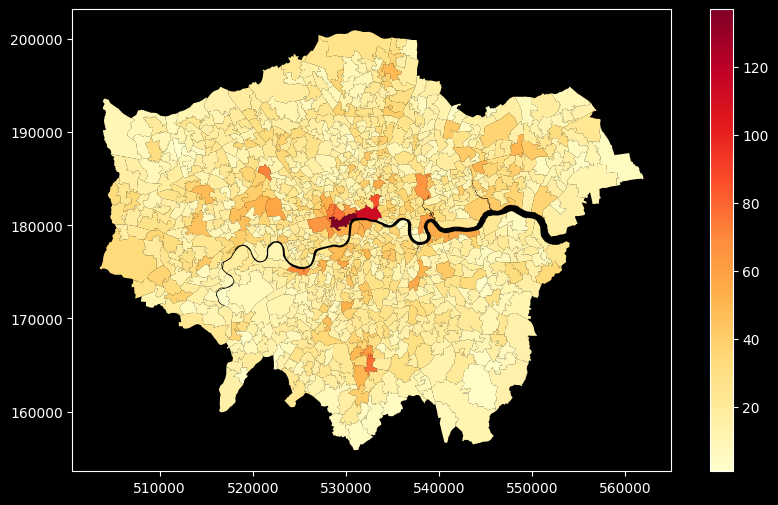

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax=plt.subplot(111)
modeling_res.plot(ax=ax, column='Accident_Number', legend=True, cmap='YlOrRd')

In [22]:
X_vars_with_coords= X_vars + ['x_coord','y_coord']
# X_vars_coord = [X_vars+['x_coord','y_coord']]
y_vars = ['Accident_Num']

In [24]:
X = modeling_res[X_vars_with_coords]
X

Person      Bike    HeavyV    LightV    Facade  WindowOpening  \
0    0.014248  0.001150  0.003009  0.033097  0.519292       0.001062   
1    0.000714  0.000000  0.001429  0.035714  0.169286       0.000000   
2    0.002200  0.000000  0.002000  0.043000  0.251600       0.000200   
3    0.000000  0.000000  0.000000  0.048333  0.243333       0.000000   
4    0.000000  0.000000  0.000000  0.030909  0.240000       0.000000   
..        ...       ...       ...       ...       ...            ...   
978  0.001190  0.000000  0.000238  0.032857  0.138095       0.000238   
979  0.002353  0.000000  0.004706  0.025882  0.405882       0.002353   
980  0.000727  0.000000  0.001636  0.032182  0.199818       0.000364   
981  0.000909  0.000303  0.003030  0.032121  0.362424       0.000909   
982  0.002647  0.000000  0.001471  0.027353  0.310294       0.000000   

         Road  Sidewalk  StreetFurniture  GreeneryTree  GreeneryGrass  \
0    0.200885  0.116283         0.005752      0.023274       0.003540   
1    0.247143  0.030714         0.005000      0.062857       0.054286   
2    0.255800  0.057000         0.006400      0.079600       0.018800   
3    0.276667  0.028333         0.003333      0.120000       0.025000   
4    0.307727  0.031818         0.000909      0.045455       0.014091   
..        ...       ...              ...           ...            ...   
978  0.257619  0.061429         0.005238      0.157143       0.041667   
979  0.201765  0.107059         0.008824      0.083529       0.008235   
980  0.262000  0.063818         0.009091      0.098000       0.034909   
981  0.235455  0.081515         0.011818      0.054242       0.020303   
982  0.230588  0.075294         0.004412      0.083235       0.020000   

          Sky    Nature        x_coord        y_coord  
0    0.040973  0.000000  532482.703937  181269.309933  
1    0.322857  0.002143  548312.914543  189881.378500  
2    0.246600  0.000000  548454.924883  188400.149798  
3    0.221667  0.000000  551008.971700  186310.934347  
4    0.280000  0.000000  548667.089281  186903.343524  
..        ...       ...            ...            ...  
978  0.245238  0.000714  540690.486531  175178.488684  
979  0.108824  0.000000  537700.196477  177616.262807  
980  0.251273  0.001273  539747.826321  179078.897542  
981  0.171212  0.000303  539775.395179  178277.541155  
982  0.182941  0.010294  538621.281201  177152.207124  

[983 rows x 15 columns]

In [25]:
y= modeling_res['Accident_Number']
y.sort_values()

770      1
729      2
436      2
586      2
358      2
      ... 
939     76
213     77
356     85
0      113
944    137
Name: Accident_Number, Length: 983, dtype: int64

In [26]:
X.corr()

Person      Bike    HeavyV    LightV    Facade  \
Person           1.000000  0.413911  0.135591  0.098451  0.568732   
Bike             0.413911  1.000000  0.065899  0.051948  0.370981   
HeavyV           0.135591  0.065899  1.000000  0.000082  0.134618   
LightV           0.098451  0.051948  0.000082  1.000000  0.214814   
Facade           0.568732  0.370981  0.134618  0.214814  1.000000   
WindowOpening    0.196867  0.083976  0.017989 -0.045994  0.245364   
Road            -0.290972 -0.178218  0.029668 -0.080115 -0.410892   
Sidewalk         0.500558  0.330782  0.107532 -0.063234  0.748511   
StreetFurniture  0.317173  0.169440  0.240182  0.067178  0.360917   
GreeneryTree    -0.269723 -0.150502 -0.128863 -0.308914 -0.648793   
GreeneryGrass   -0.406578 -0.247463 -0.173490 -0.211581 -0.709440   
Sky             -0.525212 -0.359399 -0.098164  0.004856 -0.668365   
Nature          -0.092684 -0.064656  0.087178 -0.152097 -0.194397   
x_coord         -0.056013 -0.100157  0.063545 -0.098762  0.020578   
y_coord          0.034730  0.006989  0.057257  0.165299  0.112709   

                 WindowOpening      Road  Sidewalk  StreetFurniture  \
Person                0.196867 -0.290972  0.500558         0.317173   
Bike                  0.083976 -0.178218  0.330782         0.169440   
HeavyV                0.017989  0.029668  0.107532         0.240182   
LightV               -0.045994 -0.080115 -0.063234         0.067178   
Facade                0.245364 -0.410892  0.748511         0.360917   
WindowOpening         1.000000 -0.273646  0.253967         0.064495   
Road                 -0.273646  1.000000 -0.493377        -0.087716   
Sidewalk              0.253967 -0.493377  1.000000         0.321595   
StreetFurniture       0.064495 -0.087716  0.321595         1.000000   
GreeneryTree         -0.044237 -0.097131 -0.276347        -0.286799   
GreeneryGrass        -0.150461 -0.036486 -0.562578        -0.398262   
Sky                  -0.277355  0.556622 -0.731748        -0.240286   
Nature                0.027114 -0.007161 -0.165256        -0.086978   
x_coord              -0.002164  0.032847 -0.015256        -0.068036   
y_coord              -0.049967  0.042109  0.034866         0.034672   

                 GreeneryTree  GreeneryGrass       Sky    Nature   x_coord  \
Person              -0.269723      -0.406578 -0.525212 -0.092684 -0.056013   
Bike                -0.150502      -0.247463 -0.359399 -0.064656 -0.100157   
HeavyV              -0.128863      -0.173490 -0.098164  0.087178  0.063545   
LightV              -0.308914      -0.211581  0.004856 -0.152097 -0.098762   
Facade              -0.648793      -0.709440 -0.668365 -0.194397  0.020578   
WindowOpening       -0.044237      -0.150461 -0.277355  0.027114 -0.002164   
Road                -0.097131      -0.036486  0.556622 -0.007161  0.032847   
Sidewalk            -0.276347      -0.562578 -0.731748 -0.165256 -0.015256   
StreetFurniture     -0.286799      -0.398262 -0.240286 -0.086978 -0.068036   
GreeneryTree         1.000000       0.542411 -0.105792  0.181787 -0.159316   
GreeneryGrass        0.542411       1.000000  0.408258  0.133481 -0.024387   
Sky                 -0.105792       0.408258  1.000000  0.077571  0.138097   
Nature               0.181787       0.133481  0.077571  1.000000  0.020261   
x_coord             -0.159316      -0.024387  0.138097  0.020261  1.000000   
y_coord             -0.231926      -0.096691  0.071883 -0.092335  0.029321   

                  y_coord  
Person           0.034730  
Bike             0.006989  
HeavyV           0.057257  
LightV           0.165299  
Facade           0.112709  
WindowOpening   -0.049967  
Road             0.042109  
Sidewalk         0.034866  
StreetFurniture  0.034672  
GreeneryTree    -0.231926  
GreeneryGrass   -0.096691  
Sky              0.071883  
Nature          -0.092335  
x_coord          0.029321  
y_coord          1.000000

In [27]:
import seaborn as sns
plt.style.use("seaborn")

import warnings

warnings.filterwarnings('ignore')
def plot_index_distribution(df, column, xlabel):
    fig = plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)

    sns.kdeplot(data=df[column], shade=True, color='b', ax=ax)
    plt.xlabel(xlabel)
    plt.ylabel("probability")

    plt.title(f"Probability distribution of {xlabel} based on station")

    plt.show()



def plot_index_displot(df, column, xlabel):
    fig = plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)

    sns.displot(data=df[column], ax=ax)
    plt.xlabel(xlabel)
    plt.ylabel("probability")

    plt.title(f"Probability distribution of {xlabel} based on station")

    plt.show()


C:\Users\20191\AppData\Local\Temp\ipykernel_24828\2132975799.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


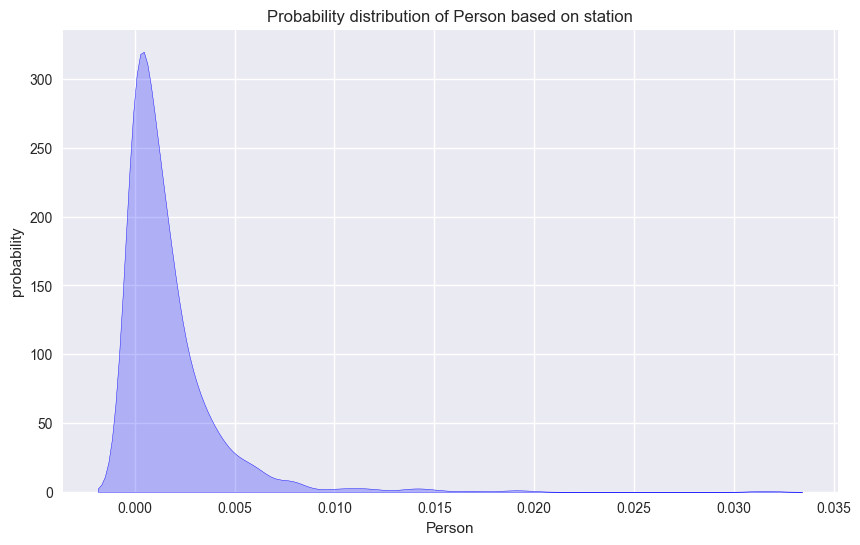

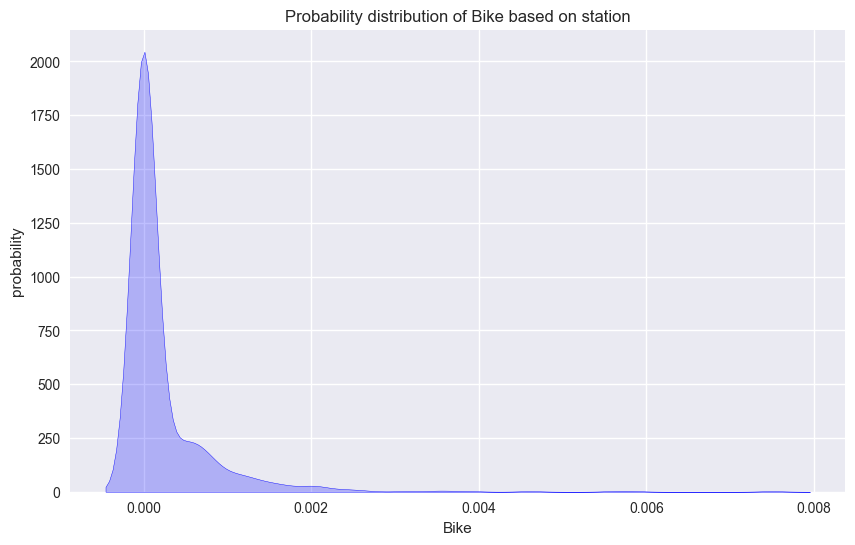

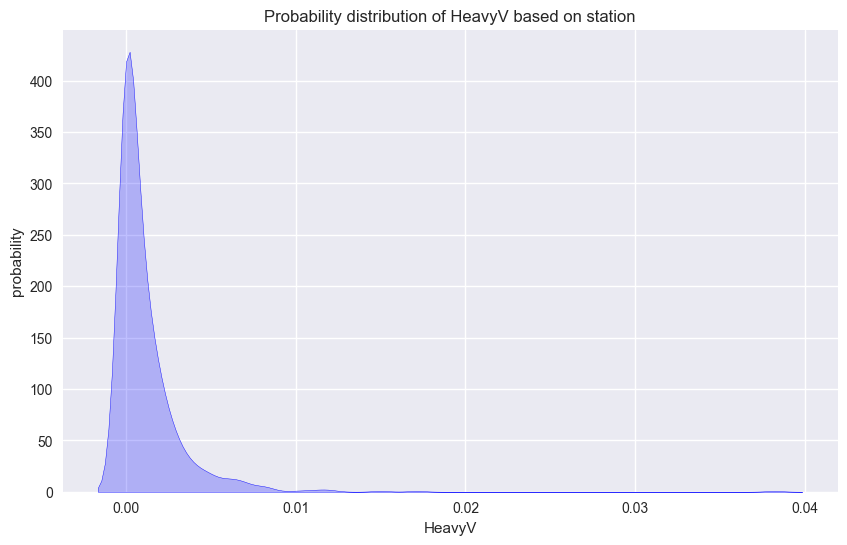

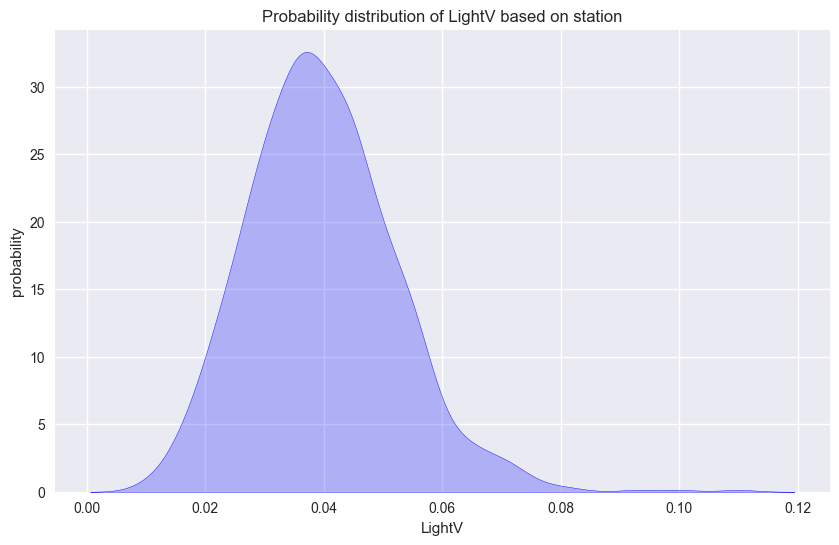

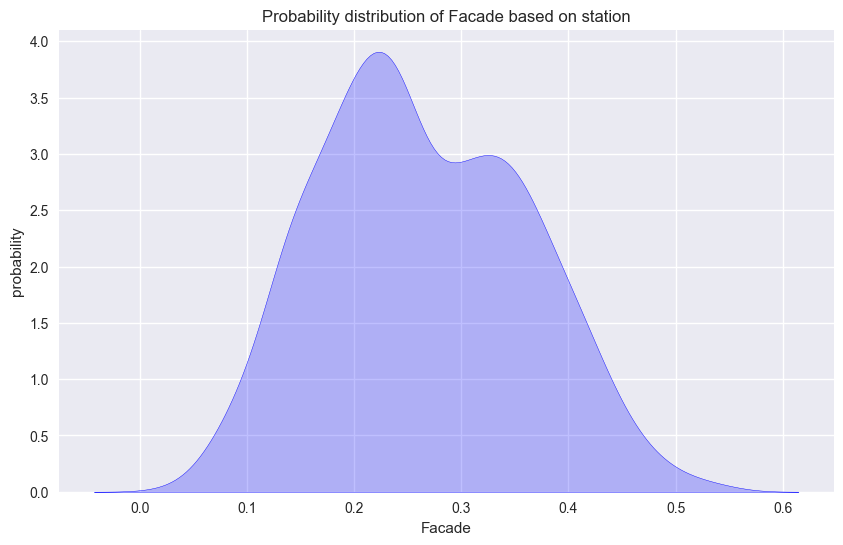

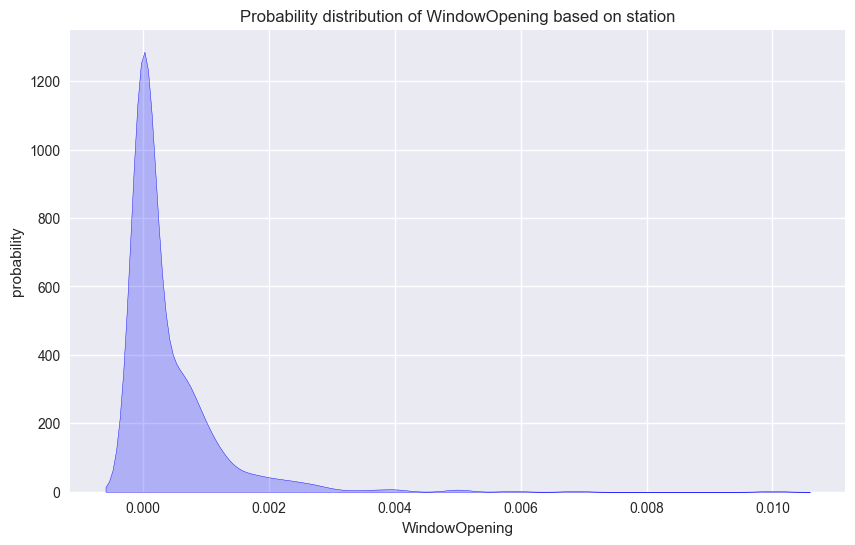

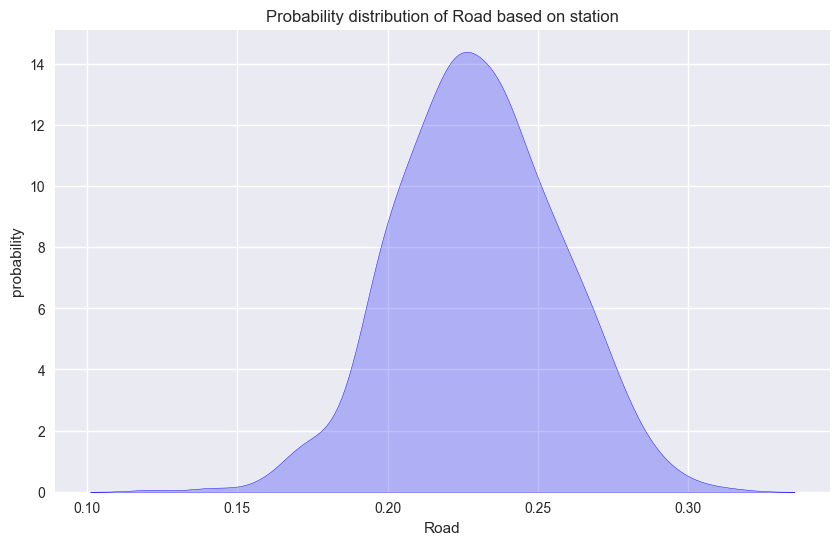

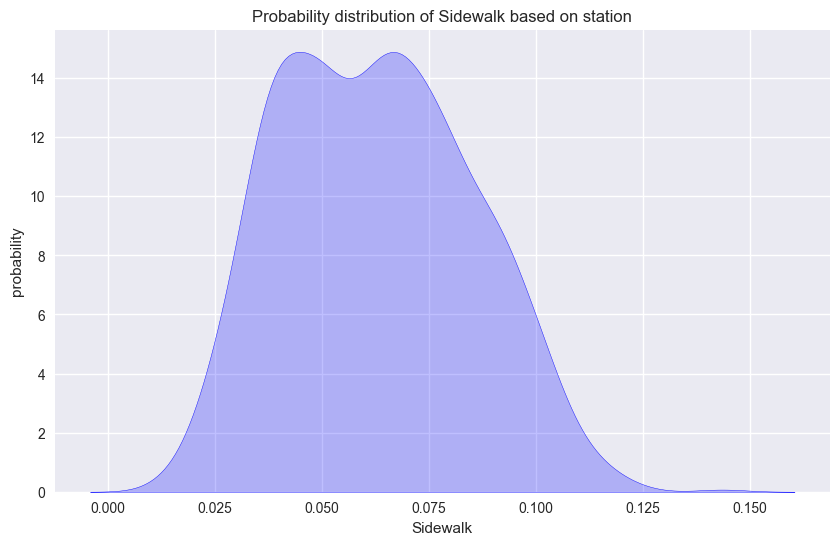

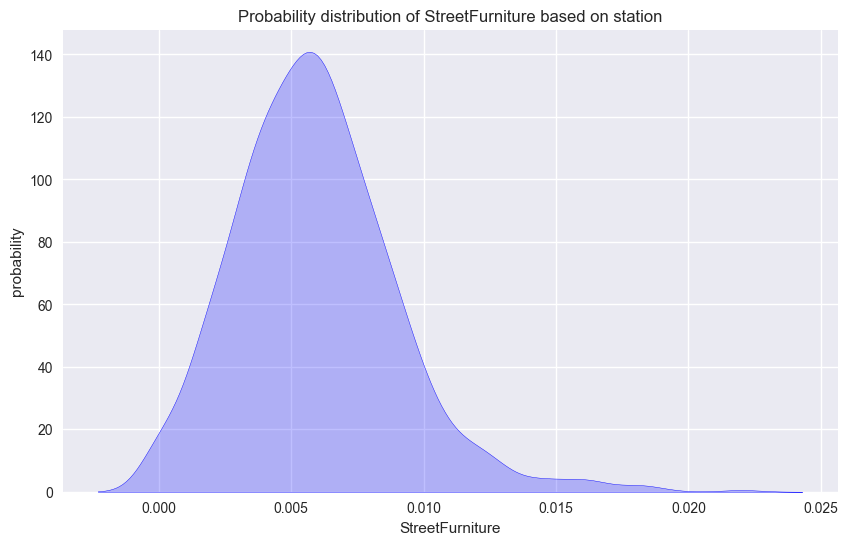

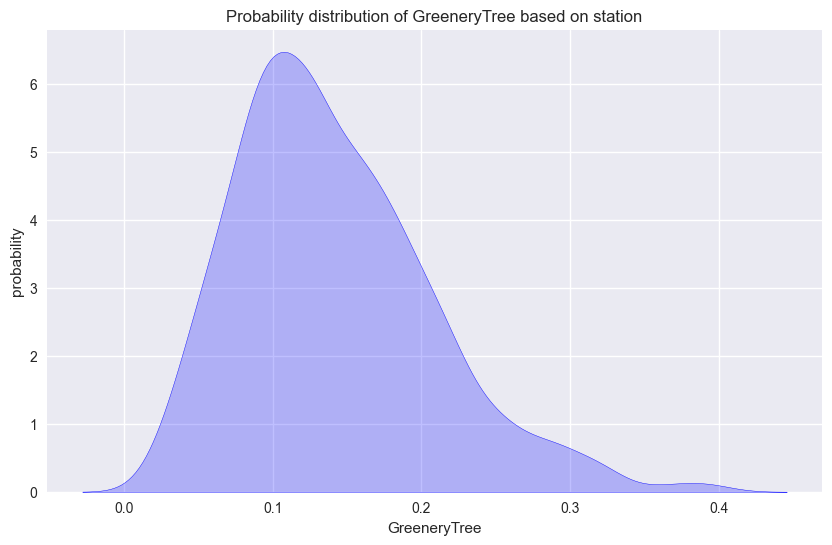

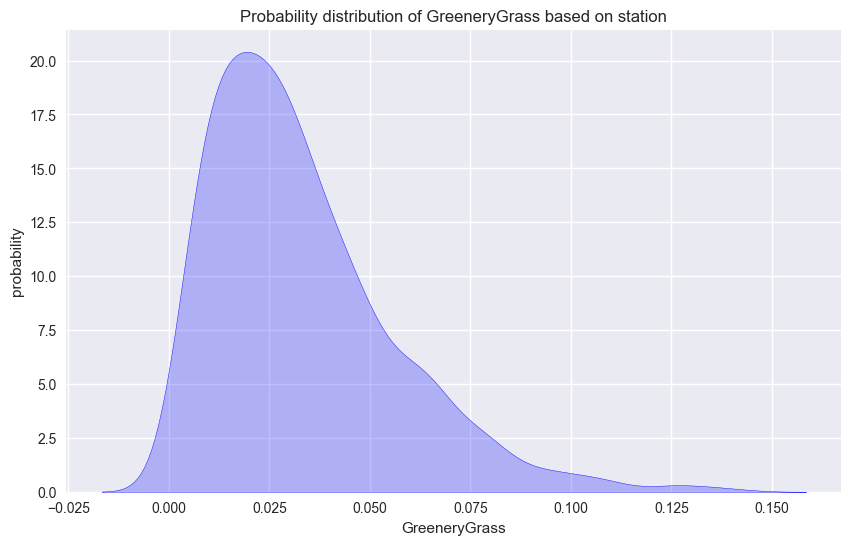

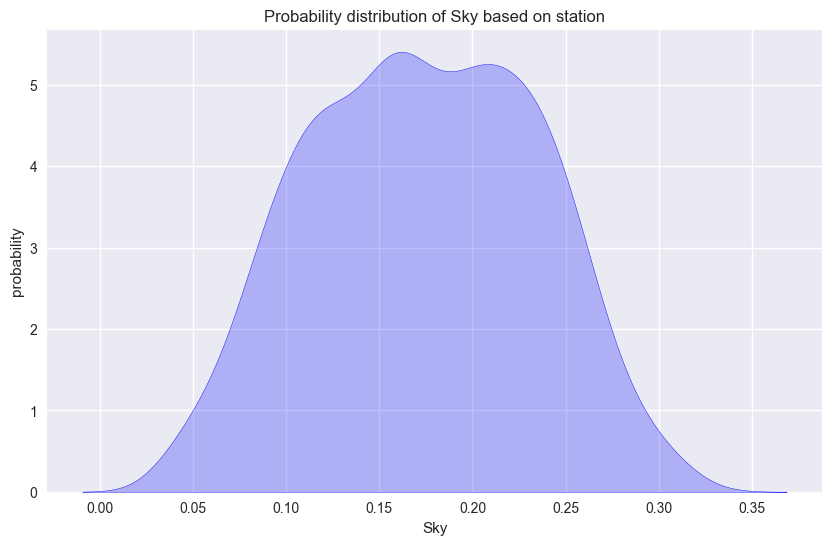

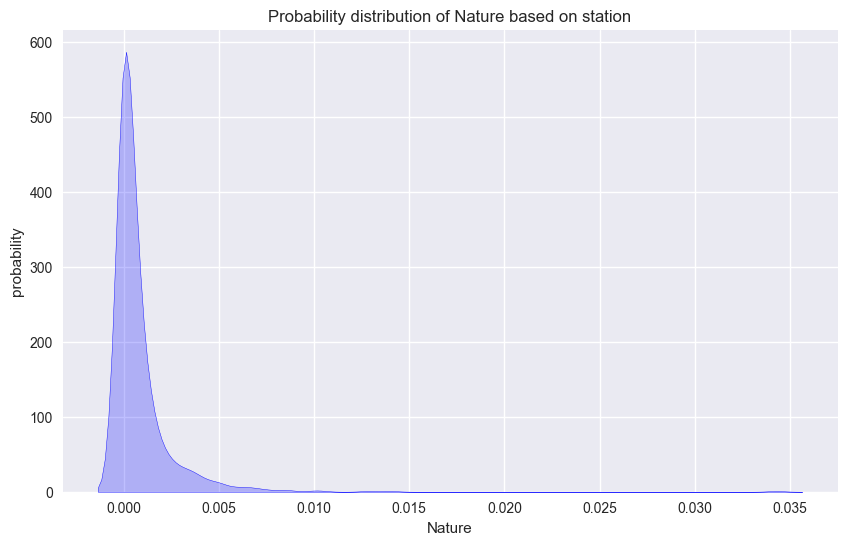

In [28]:
for index in X.columns.tolist()[:-2]:
    plot_index_distribution(X, index, index)

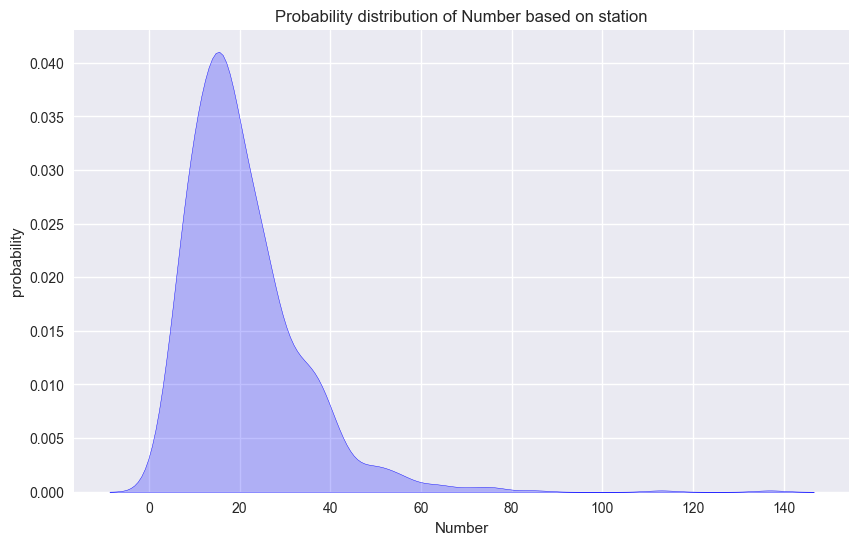

In [29]:
plot_index_distribution(modeling_res,'Accident_Number','Number')

In [30]:
import xgboost
import shap
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=222)

In [32]:
import warnings

warnings.filterwarnings('ignore')

In [34]:
%%time
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
import numpy as np
# Choose hyperparameter domain to search over
space = {
    'max_depth':
    hp.choice('max_depth', np.arange(1, 30, 1, dtype=int)),
    'colsample_bytree':
    hp.quniform('colsample_bytree', 0.3, 1.01, 0.05),
    'min_child_weight':
    hp.choice('min_child_weight', np.arange(1, 30, 1, dtype=int)),
    'subsample':
    hp.quniform('subsample', 0.3, 1.01, 0.05),
    'learning_rate':
    hp.choice('learning_rate', np.arange(0.05, 1.01, 0.05)),
    'gamma':
    hp.quniform('gamma', 0.1, 5, 0.05),
    'objective':
    'reg:squarederror',
    'eval_metric':
    'rmse',
}


def score(params, n_folds=5):

    #Cross-validation
    d_train = xgboost.DMatrix(X, y)

    cv_results = xgboost.cv(params,
                            d_train,
                            nfold=n_folds,
                            num_boost_round=100,
                            early_stopping_rounds=10,
                            metrics='rmse',
                            seed=0)

    loss = min(cv_results['test-rmse-mean'])

    return loss


def optimize(trials, space):

    best = fmin(score,
                space,
                algo=tpe.suggest,
                max_evals=100,
                rstate=np.random.default_rng(333))  #Add seed to fmin function
    return best


trials = Trials()
best_params = optimize(trials, space)

# Return the best parameters
best_params = space_eval(space, best_params)

best_params

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 100/100 [01:17<00:00,  1.29trial/s, best loss: 9.008161487770275]
Wall time: 1min 17s


{'colsample_bytree': 0.65,
 'eval_metric': 'rmse',
 'gamma': 0.9,
 'learning_rate': 0.1,
 'max_depth': 13,
 'min_child_weight': 26,
 'objective': 'reg:squarederror',
 'subsample': 1.0}

In [35]:
data_test = xgboost.DMatrix(X_test, y_test)

data = xgboost.DMatrix(X_train, y_train)
final_model = xgboost.train(best_params,
                            data,
                            num_boost_round=500,
                            verbose_eval=False,
                            evals=[(data_test, "Test")],
                            early_stopping_rounds=10)

data_all = xgboost.DMatrix(X)
y_pred = final_model.predict(data_all)
print(np.sqrt(mean_squared_error(y, y_pred)))
print(r2_score(y, y_pred))

6.232140429283166
0.7638003009914238


In [36]:
explainer_shap = shap.TreeExplainer(final_model)
shap_values = explainer_shap(X)

In [37]:
shap_interaction_values = shap.TreeExplainer(
    final_model).shap_interaction_values(X)

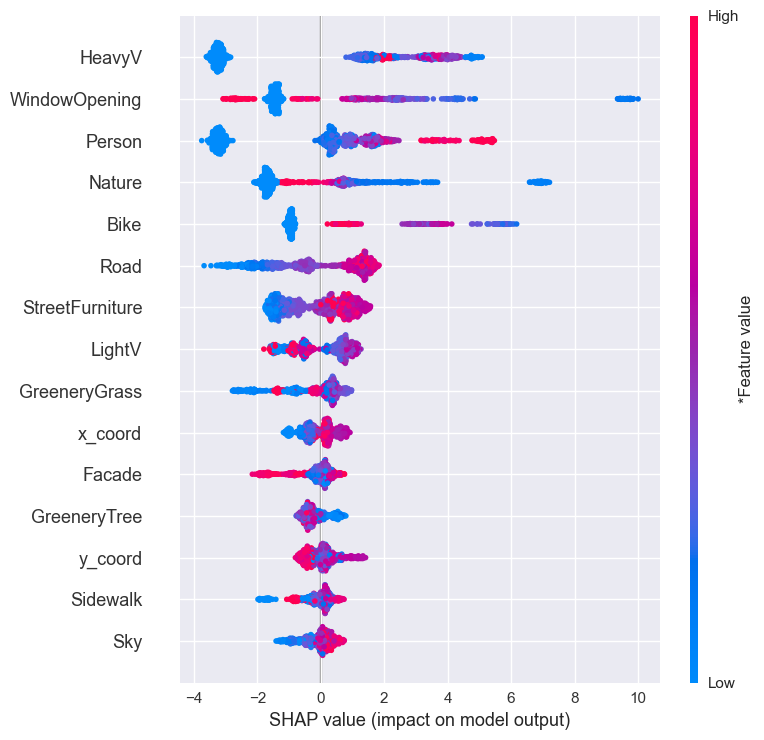

In [38]:
X_names = X.columns.tolist()

fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

shap.summary_plot(shap_interaction_values,
                  X,
                  max_display=15,
                  feature_names=X_names,
                  plot_type="compact_dot")

In [42]:
from tqdm import tqdm

shap_bootstrap_list = []


def boostrap_shap(y_pred):
    n = y.shape[0]
    err = y - y_pred

    for i in tqdm(range(100)):

        random_sample_index = np.random.choice(np.arange(n),
                                               size=n,
                                               replace=True)

        y_sample = y_pred + err[random_sample_index]

        sample_data = xgboost.DMatrix(X, y_sample)

        sample_model = xgboost.train(best_params,
                                     sample_data,
                                     num_boost_round=500,
                                     verbose_eval=False,
                                     evals=[(data_test, "Test")],
                                     early_stopping_rounds=10)

        explainer_shap = shap.Explainer(sample_model)
        shap_values = explainer_shap(X)

        shap_bootstrap_list.append(shap_values.values)

    return np.array(shap_bootstrap_list)

In [43]:
%%time
np.random.seed(333)

shap_bootstrap_list = boostrap_shap(y_pred)

100%|██████████| 100/100 [00:24<00:00,  4.10it/s]

Wall time: 24.4 s


In [44]:
l_shap_global = np.abs(shap_bootstrap_list).mean(axis=1).mean(
    axis=0) - np.percentile(
        np.abs(shap_bootstrap_list).mean(axis=1), axis=0, q=2.5)

u_shap_global = np.percentile(
    np.abs(shap_bootstrap_list).mean(axis=1), axis=0,
    q=97.5) - np.abs(shap_bootstrap_list).mean(axis=1).mean(axis=0)

df_mean_shap = pd.DataFrame(np.vstack([
    np.array(X.columns),
    np.abs(shap_bootstrap_list).mean(axis=1).mean(axis=0), l_shap_global,
    u_shap_global,
    np.percentile(np.abs(shap_bootstrap_list).mean(axis=1), axis=0, q=2.5),
    np.percentile(np.abs(shap_bootstrap_list).mean(axis=1), axis=0, q=97.5)
]).T,
                            columns=[
                                'Feature', 'SHAP', 'SHAP_err_l', 'SHAP_err_u',
                                'SHAP_l', 'SHAP_u'
                            ])

In [45]:
df_mean_shap = df_mean_shap.sort_values(by="SHAP", ascending=True)

df_mean_shap["SHAP"] = df_mean_shap["SHAP"].astype("float")
df_mean_shap["SHAP_err_u"] = df_mean_shap["SHAP_err_u"].astype("float")
df_mean_shap["SHAP_err_l"] = df_mean_shap["SHAP_err_l"].astype("float")

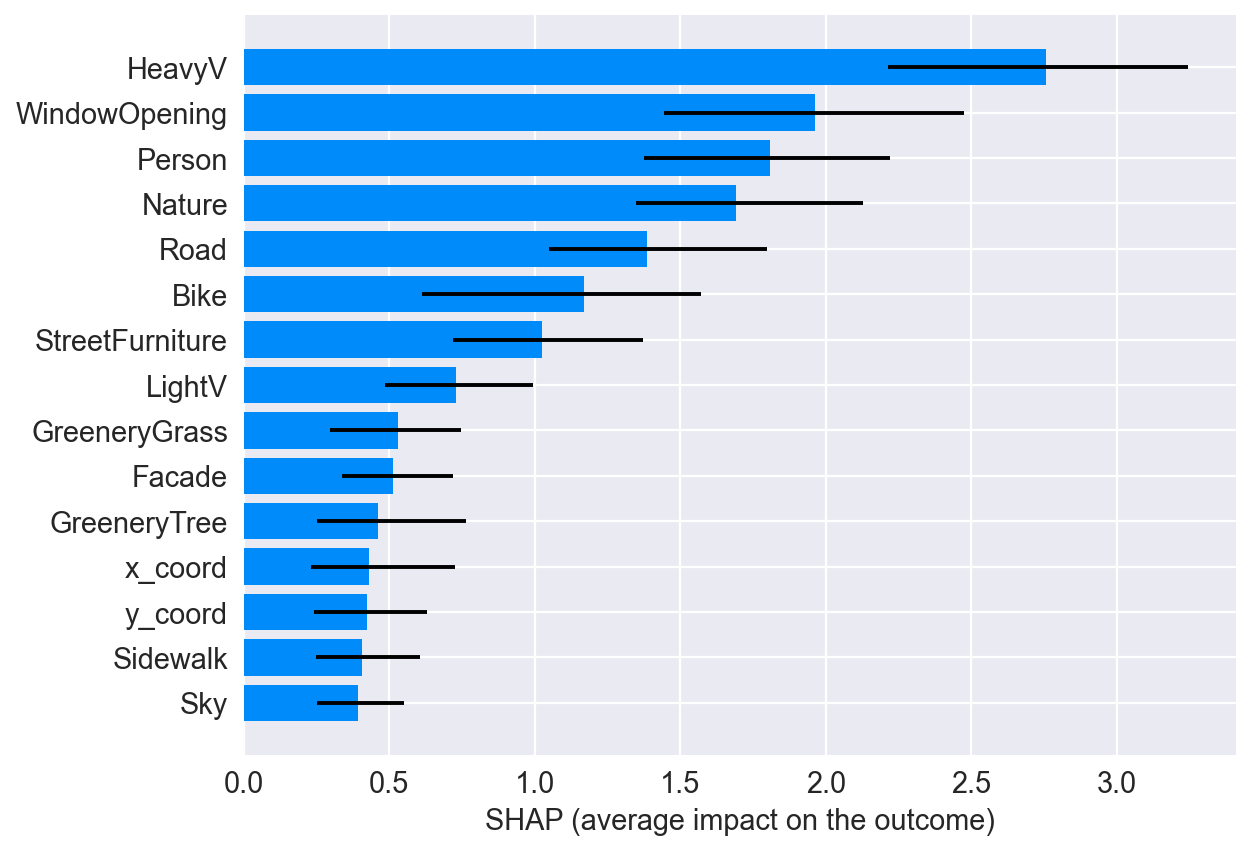

In [46]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 6), dpi=160)

ax.barh(df_mean_shap.Feature,
        df_mean_shap.SHAP,
        xerr=df_mean_shap[['SHAP_err_l', 'SHAP_err_u']].values.T,
        color=shap.plots.colors.blue_rgb)

ax.set_xlabel('SHAP (average impact on the outcome)', fontsize=13)
ax.tick_params(labelsize=13)

In [47]:
#Compute the 95% confidence interval
l_95 = np.percentile(shap_bootstrap_list, axis=0, q=2.5)
u_95 = np.percentile(shap_bootstrap_list, axis=0, q=97.5)

In [48]:
import seaborn as sns


def plot(ax, term=0):

    order = np.argsort(X.values[:, term])

    ax.fill_between(X.values[:, term][order],
                    l_95[:, term][order],
                    u_95[:, term][order],
                    color='lightblue',
                    alpha=0.6)

    ax.scatter(X.values[:, term][order],
               shap_bootstrap_list.mean(axis=0)[:, term][order],
               s=10,
               color='black')

    ax.axhline(
        0,
        color='r',
        linestyle='--',
    )
    ax.set_xlabel(X_names[term], fontsize=13)
    #ax.set_ylim(-2.5,2.5)
    ax.set_ylabel("SHAP value", fontsize=13)
    plt.tight_layout()

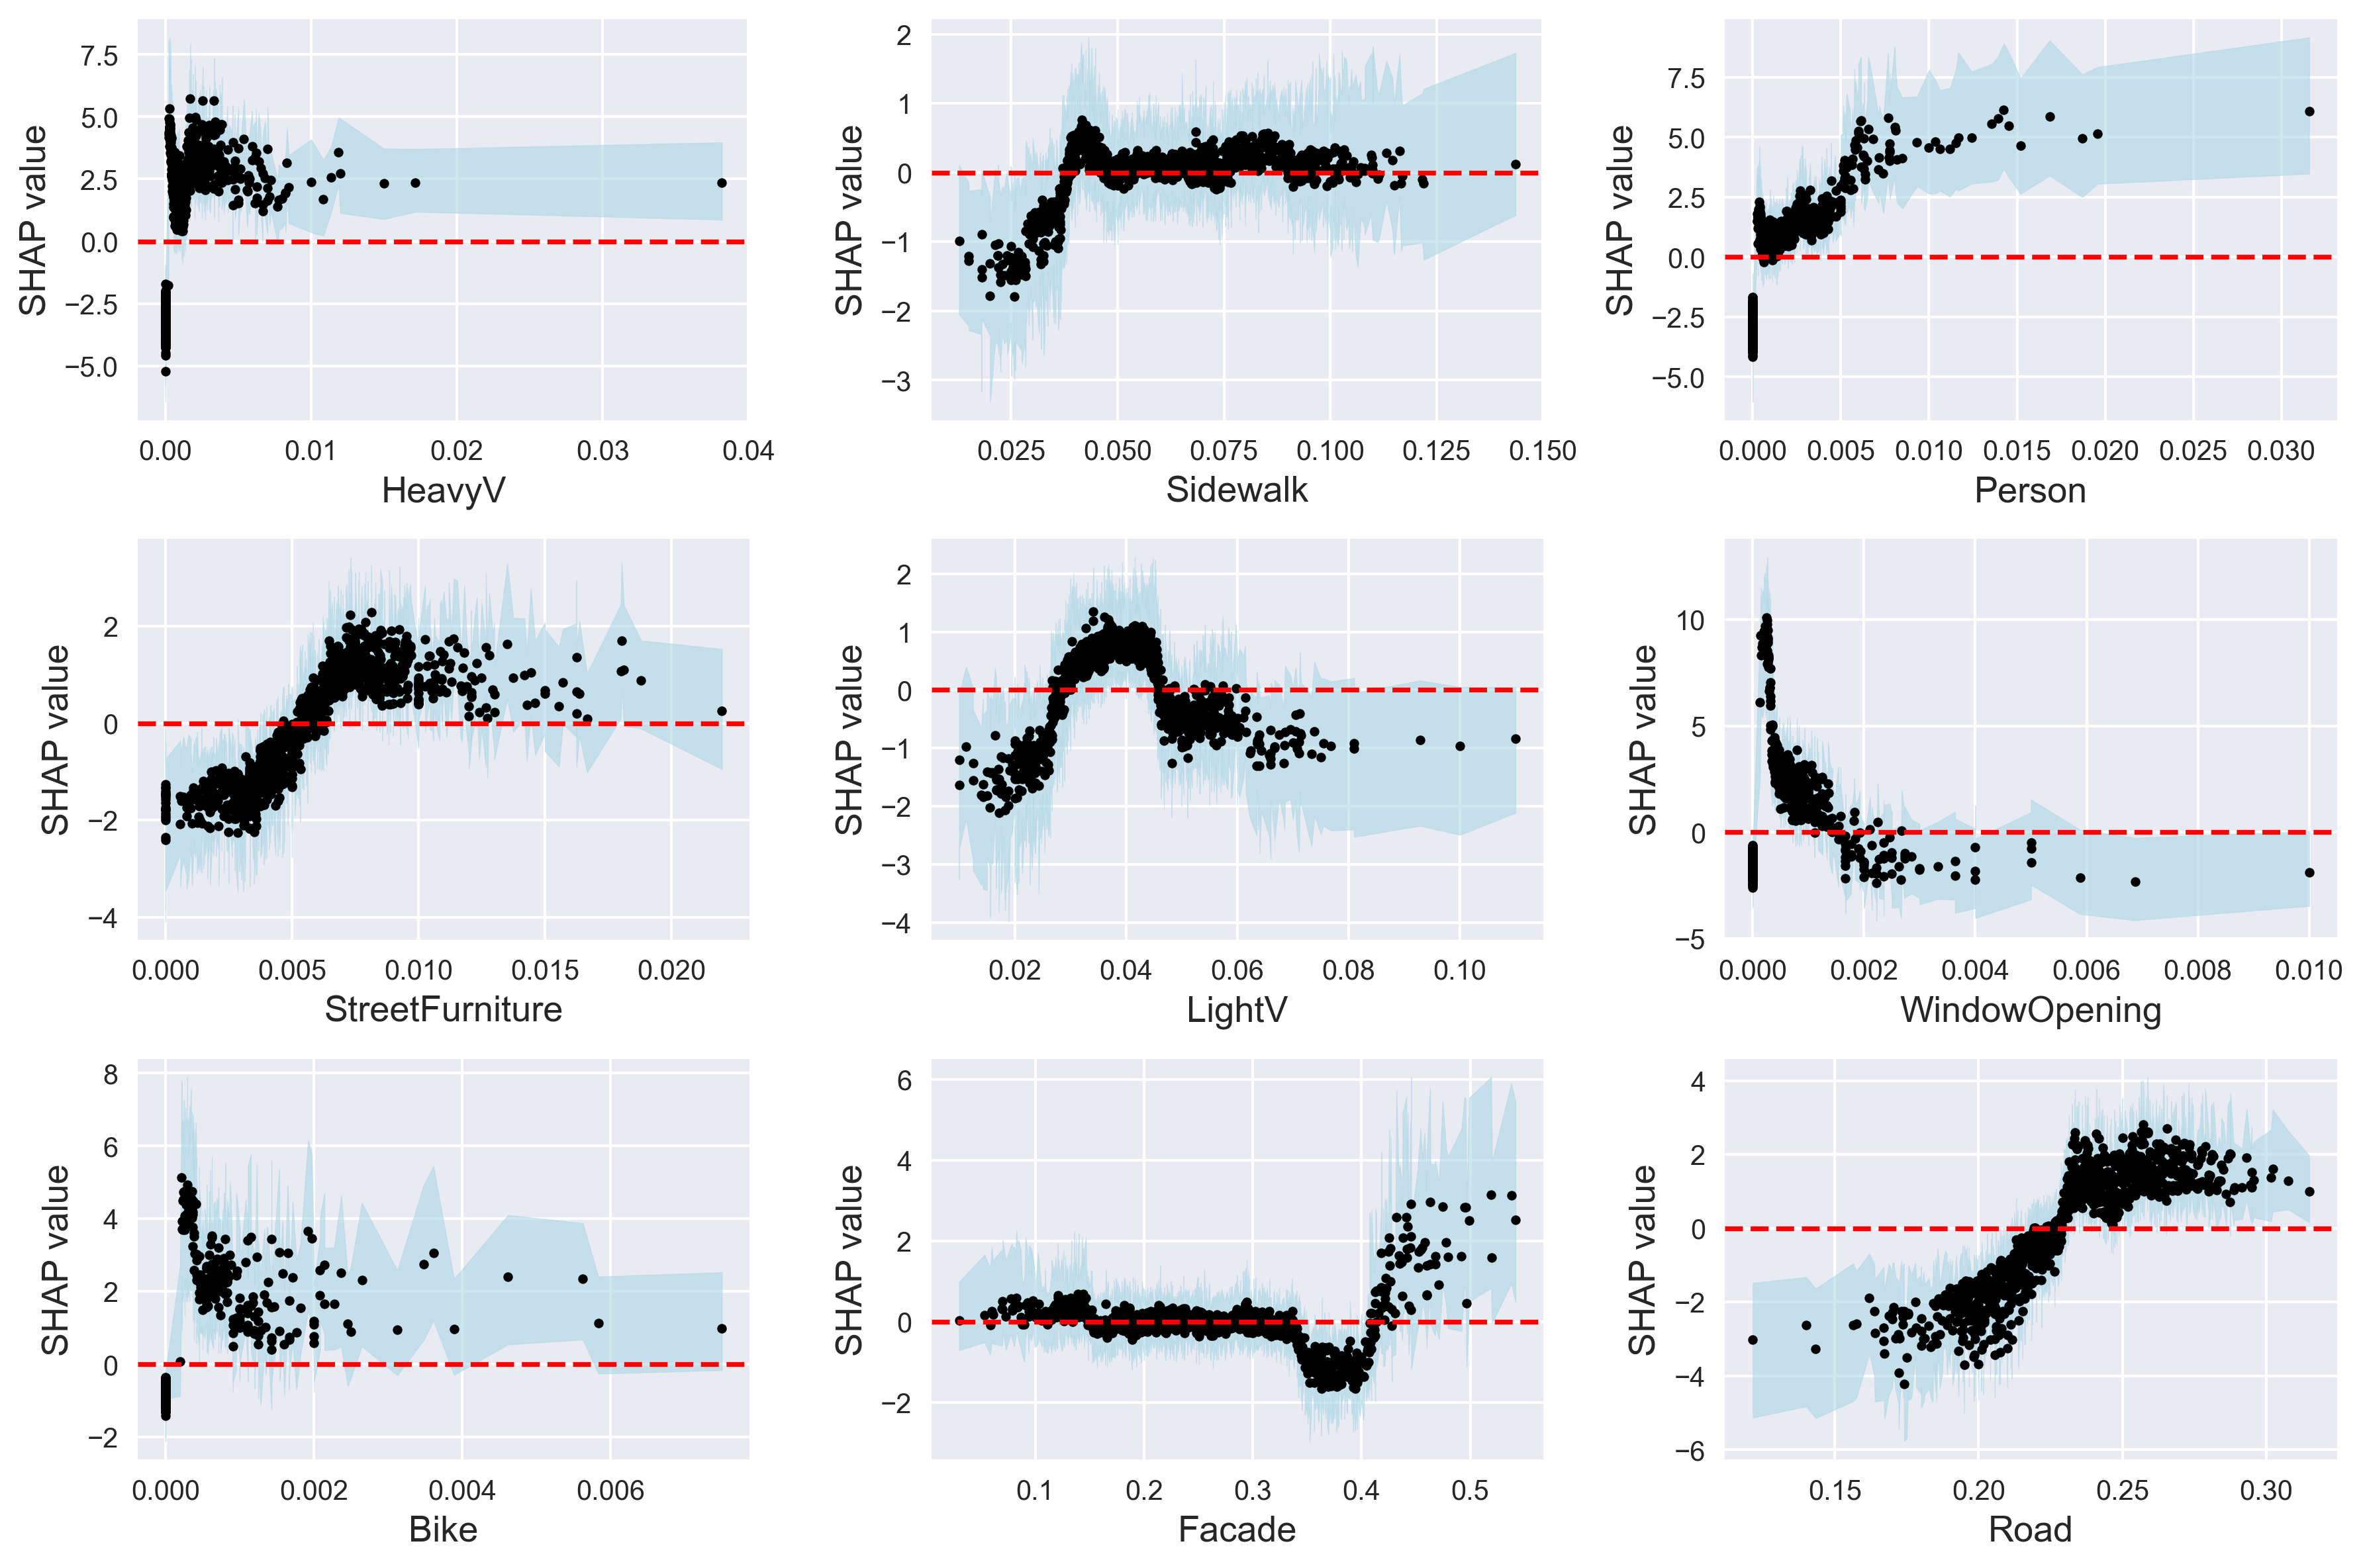

In [49]:
fig, ax = plt.subplots(3, 3, figsize=(12, 8), dpi=300)
ax = ax.ravel()
index = 0
for j in [2, 7, 0, 8, 3, 5, 1, 4, 6]:
    plot(ax=ax[index], term=j)
    index += 1


IndexError: index 9 is out of bounds for axis 0 with size 9

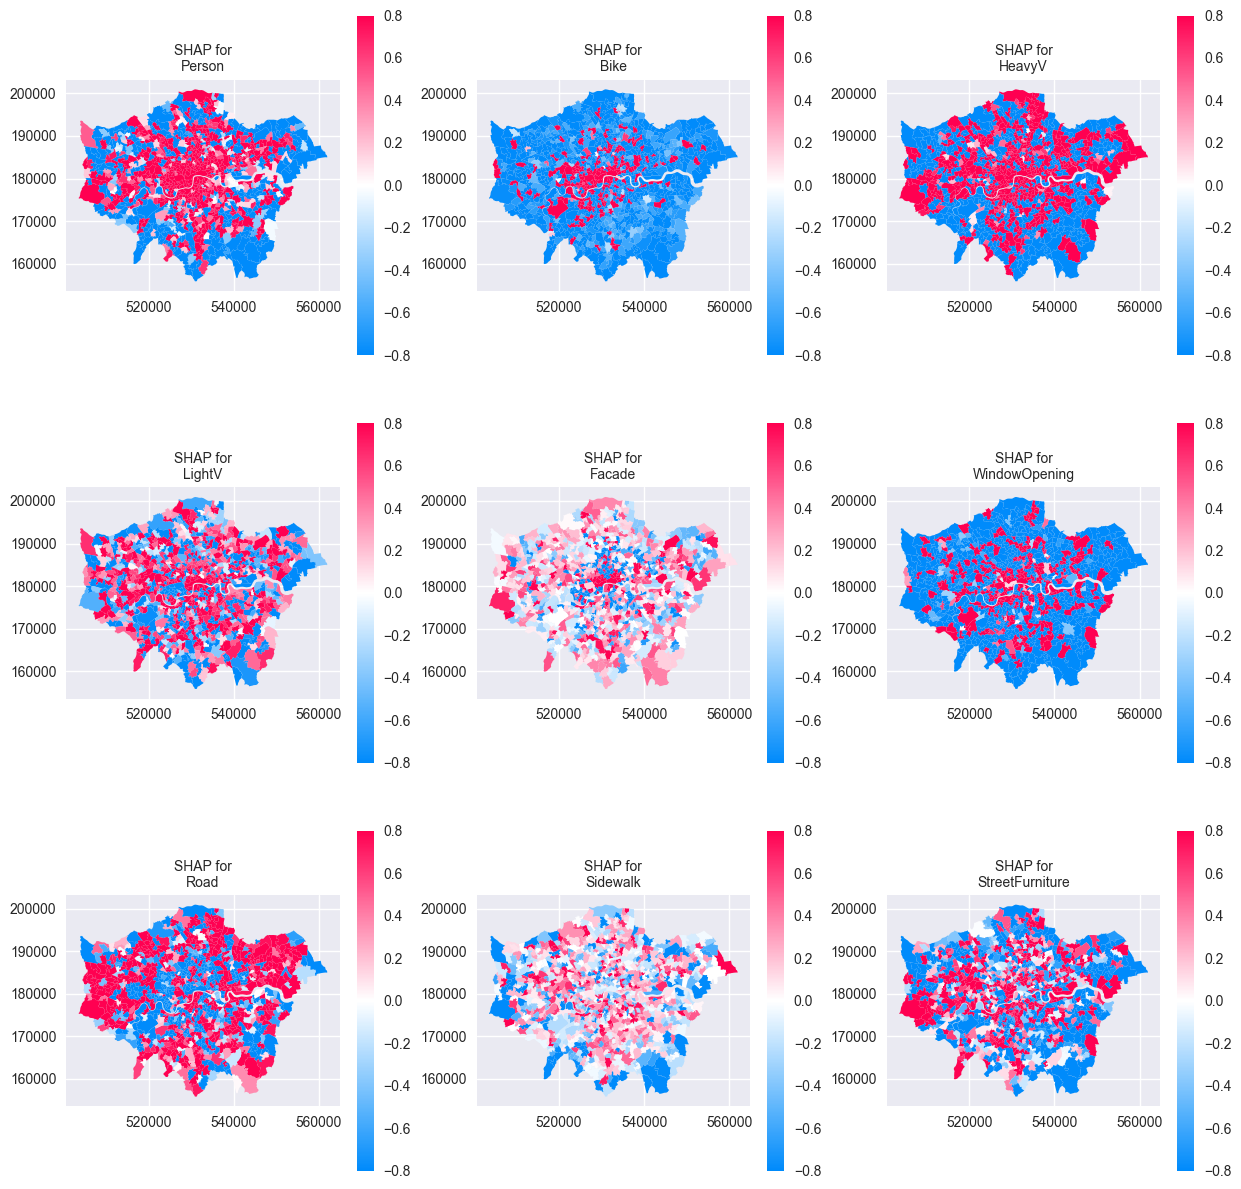

In [50]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for j in range(len(X_vars)-2):
    ax = ax.ravel()
    modeling_res.plot(ax=ax[j],
                 column=shap_values.values[:, j],
                 legend=True,
                 vmin=-0.8,
                 vmax=0.8,
                 cmap=shap.plots.colors.red_white_blue)

    ax[j].set_title("SHAP for\n" + X_vars[j], fontsize=10)

(500655.0629697761, 564875.8129508395, 153596.65737396356, 203187.7494574752)

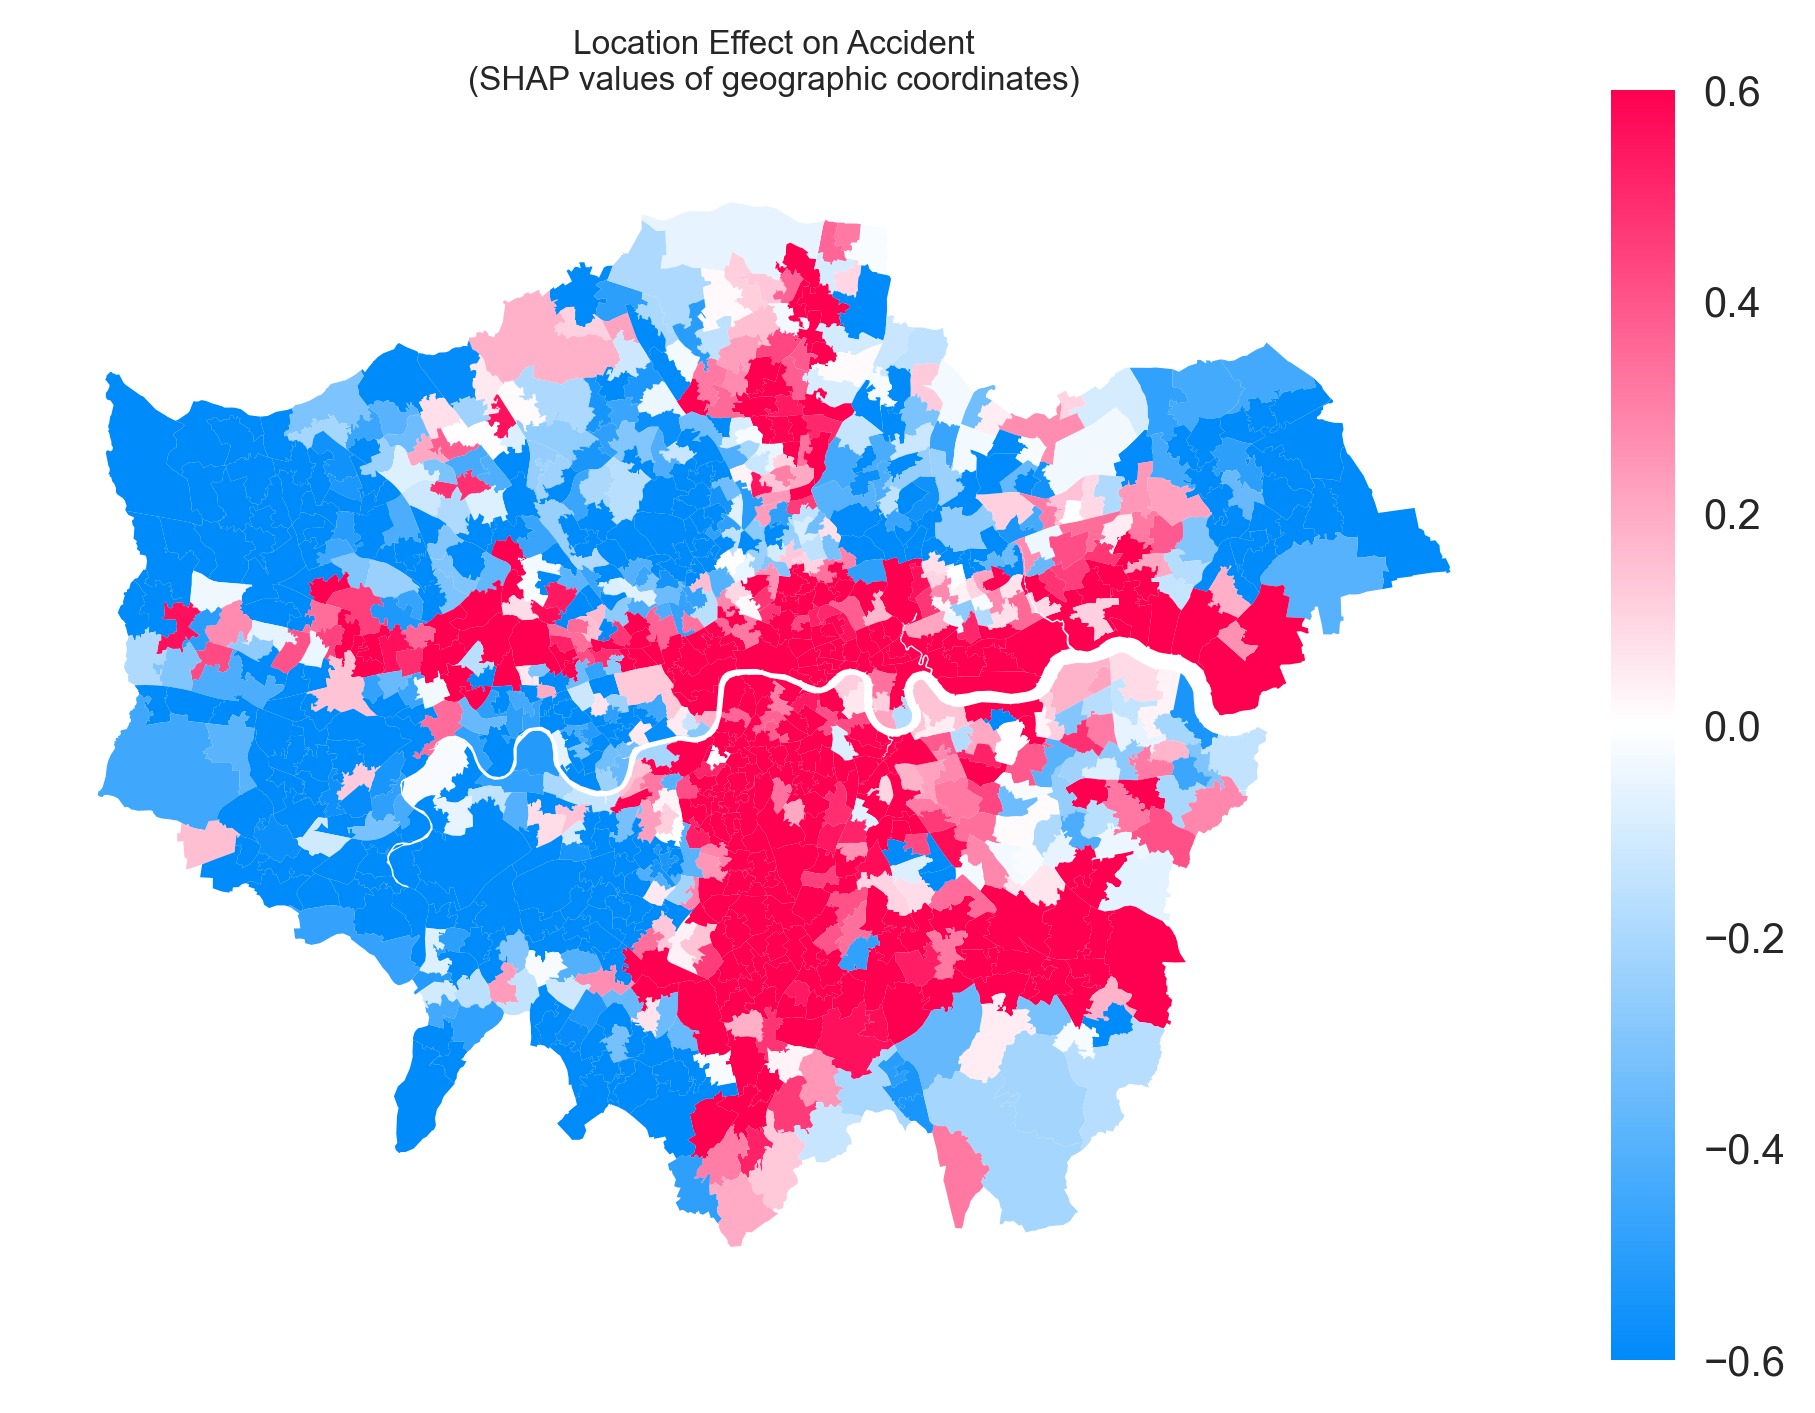

In [51]:
fig, ax = plt.subplots(dpi=300)

modeling_res.plot(ax=ax,
             column=shap_values.values[:, -1] + shap_values.values[:, -2],
             legend=True,
             vmin=-0.6,
             vmax=0.6,
             figsize=(15, 8),
             cmap=shap.plots.colors.red_white_blue)

plt.title(
    "Location Effect on Accident\n(SHAP values of geographic coordinates)\n",
    fontsize=8)

plt.axis('off')

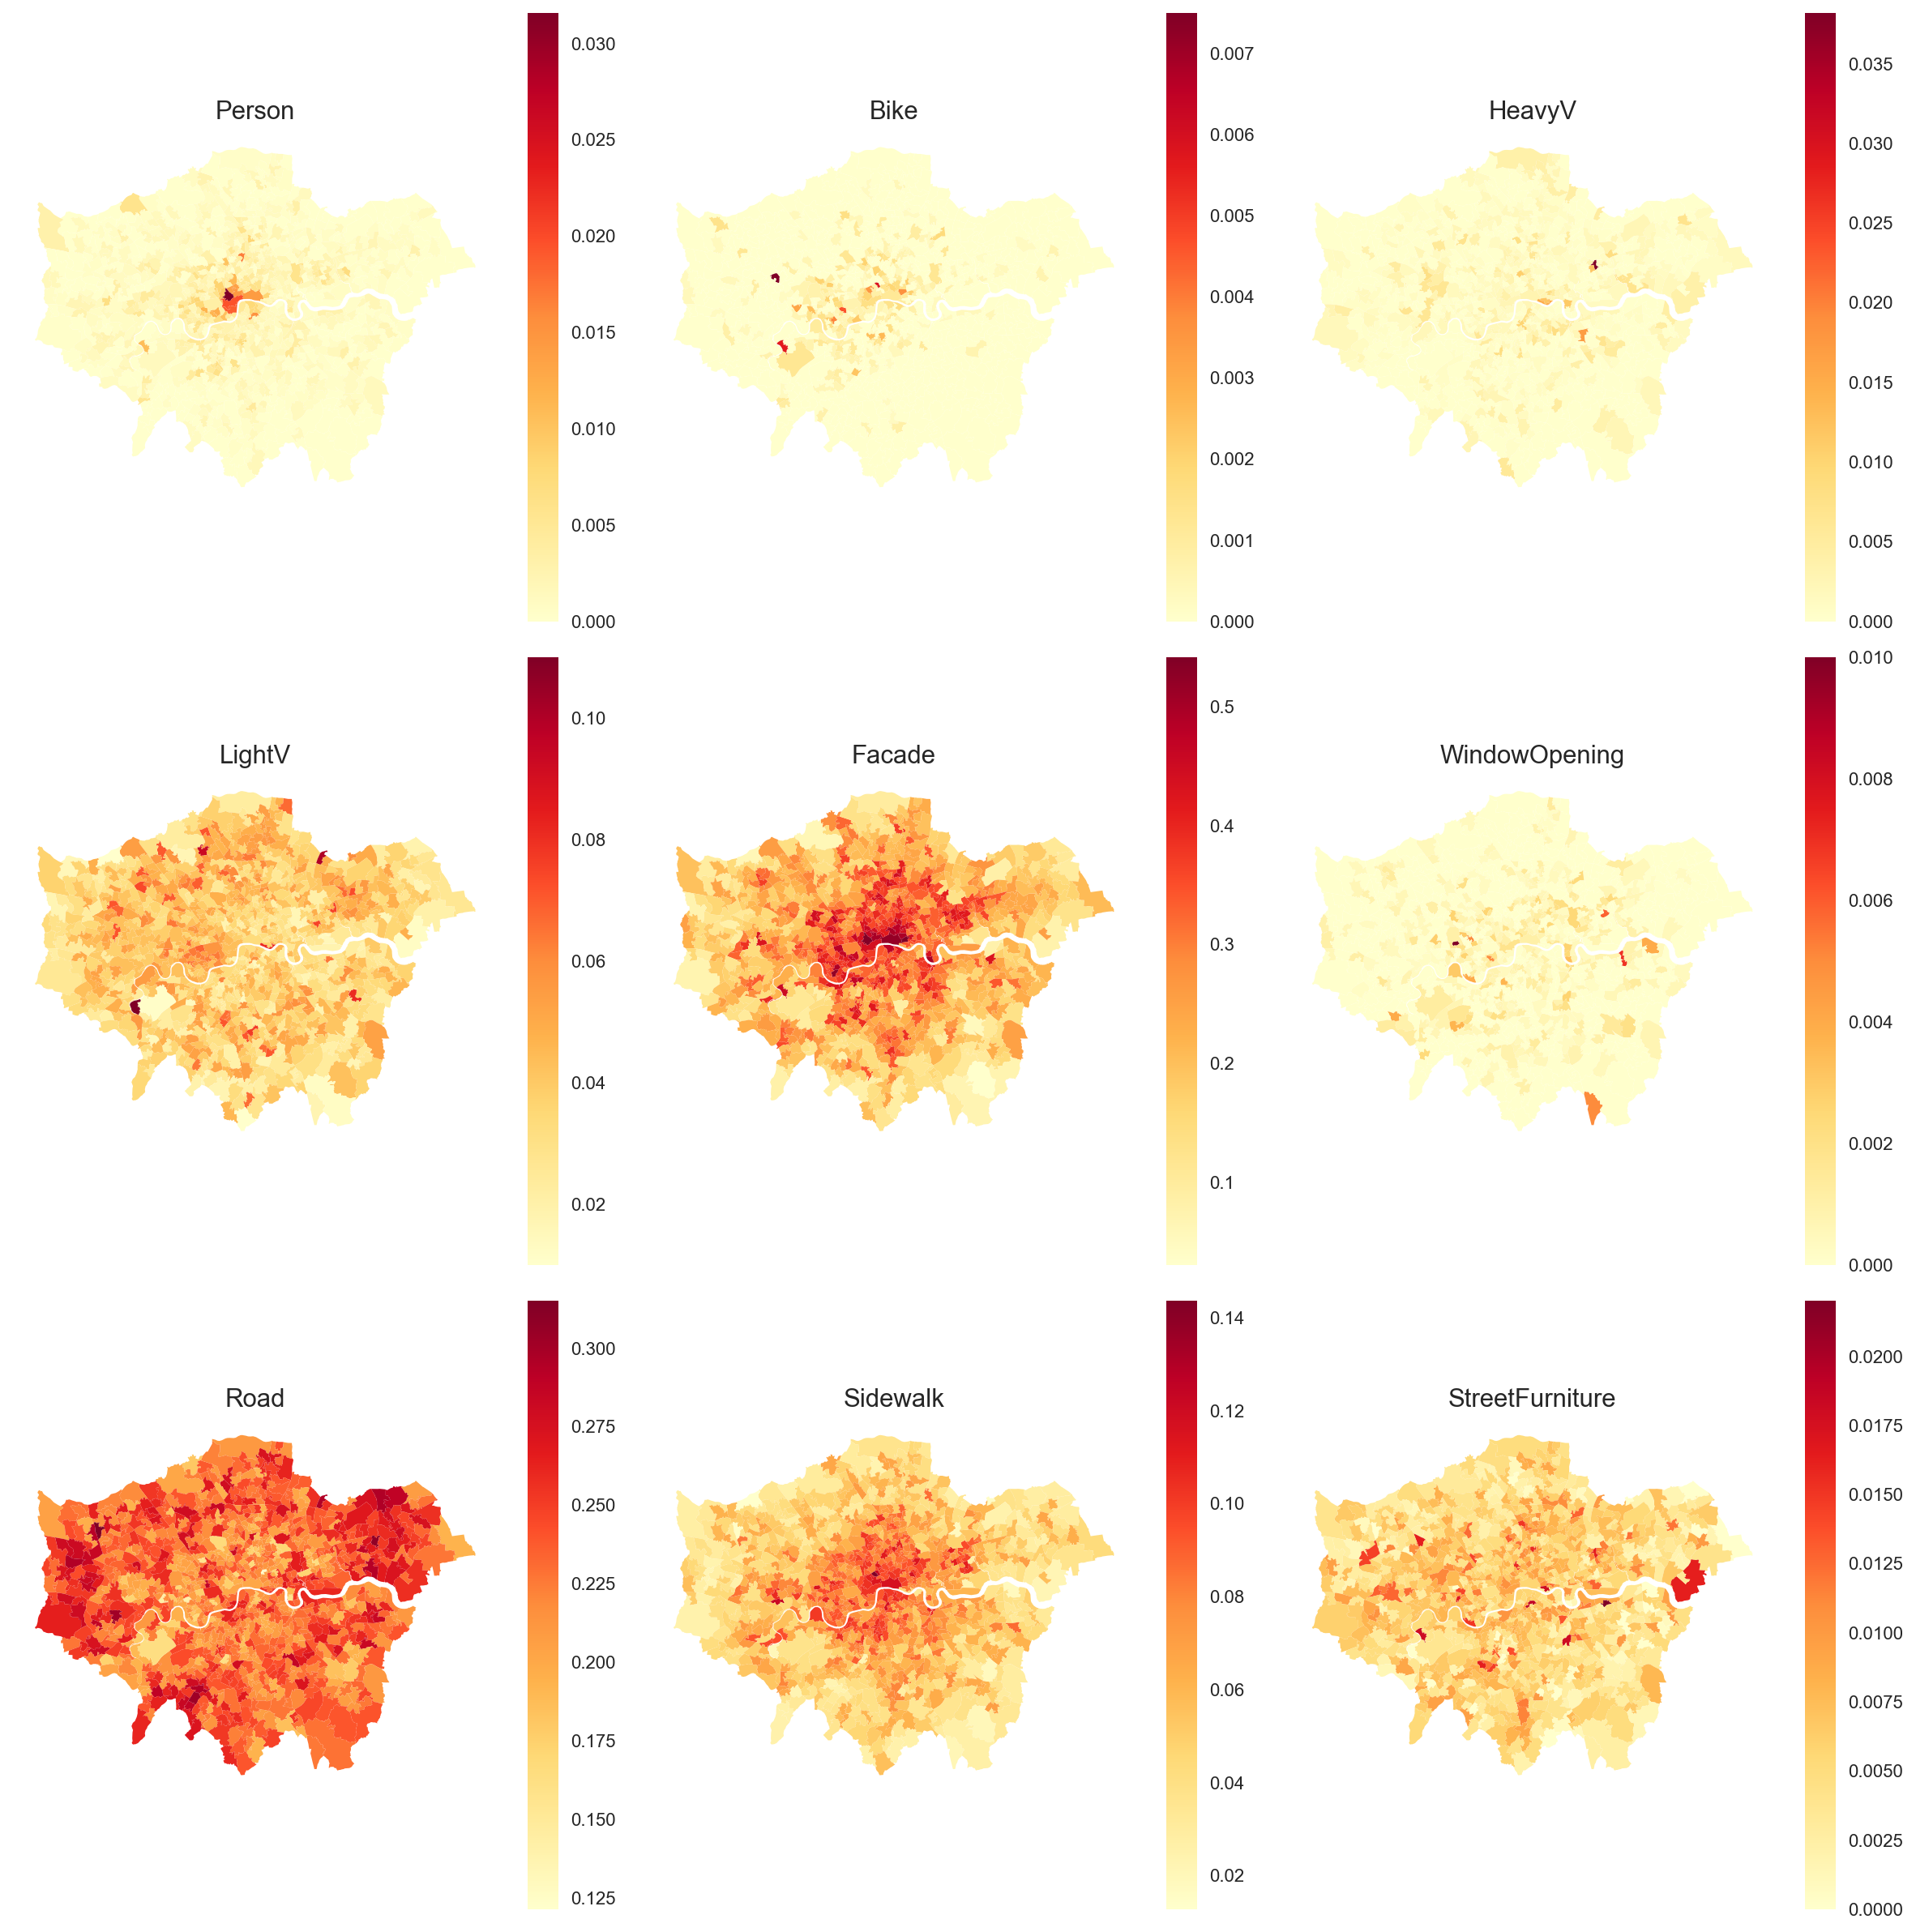

In [52]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15), dpi=160)

for j in [2, 7, 0, 8, 3, 5, 1, 4, 6]:
    ax = ax.ravel()

    modeling_res.plot(ax=ax[j],
                      column=shap_values.data[:, j],
                      legend=True,
                      cmap='YlOrRd')

    ax[j].set_title(X_names[j], fontsize=14)
    ax[j].axis('off')

fig.tight_layout()